In [1]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.3 MB/s eta 0:00:00


In [2]:
#create samples :
import os
import torch
import pickle
import pandas as pd

def load_graph(path, is_pickle=True):
    """
    Load a molecule graph (.pkl) or a protein graph (.pt).
    If is_pickle is True, use pickle to load the file; otherwise, use torch.load.
    """
    if is_pickle:
        with open(path, 'rb') as f:
            return pickle.load(f)
    else:
        return torch.load(path)

def prepare_dataset_individual_save_as_pt(filtered_dataset, molecule_graph_dir, protein_graph_dir, output_dir):
    """
    Incrementally prepares the dataset and saves each (molecule, protein, target) tuple as a separate .pt file.

    Args:
    - filtered_dataset: The filtered KIBA dataset (DataFrame).
    - molecule_graph_dir: Directory where molecule graphs are stored.
    - protein_graph_dir: Directory where protein graphs are stored.
    - output_dir: Directory to save the prepared dataset incrementally.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for index, row in filtered_dataset.iterrows():
        protein_id = row['Target_ID']
        chembl_id = row['Drug_ID']

        # Load the protein graph (.pt)
        pro_graph_path = os.path.join(protein_graph_dir, f"{protein_id}_graph.pt")
        if not os.path.exists(pro_graph_path):
            print(f"Protein graph not found: {protein_id}")
            continue
        pro_graph = load_graph(pro_graph_path, is_pickle=False)

        # Load the molecule graph (.pkl)
        mol_graph_path = os.path.join(molecule_graph_dir, f"{chembl_id}_graph.pkl")
        if not os.path.exists(mol_graph_path):
            print(f"Molecule graph not found: {chembl_id}")
            continue
        mol_graph = load_graph(mol_graph_path)

        # Load target (affinity value)
        target = torch.tensor([row['Y']], dtype=torch.float)

        # Create the sample as a tuple (molecule graph, protein graph, target)
        sample = (mol_graph, pro_graph, target)

        # Save the sample as a .pt file
        sample_path = os.path.join(output_dir, f"sample_{index}.pt")
        torch.save(sample, sample_path)

        if(index%10000 == 0 ):
            print(f"Saved sample {index} as {sample_path}")




# Example usage for individual saving
molecule_graph_dir = '/kaggle/input/graphs/molecule_graphs'  # Directory where molecule graphs are stored
protein_graph_dir = '/kaggle/input/graphs/ProteinGraphs'  # Directory where protein graphs are stored
filtered_dataset_path = '/kaggle/input/graphs/filtered_DavisDataSet.csv'  # Path to the filtered dataset CSV
output_dir = 'prepared_samples/'  # Directory to save individual samples

# Load filtered dataset CSV
filtered_dataset = pd.read_csv(filtered_dataset_path)

# Prepare the dataset incrementally, saving each sample as a .pt file
prepare_dataset_individual_save_as_pt(filtered_dataset, molecule_graph_dir, protein_graph_dir, output_dir)

print("Dataset preparation completed.")


<ipython-input-2-c90b9d14e3c5>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path)


Saved sample 0 as prepared_samples/sample_0.pt


<ipython-input-2-c90b9d14e3c5>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path)


Saved sample 10000 as prepared_samples/sample_10000.pt
Dataset preparation completed.


Running on cuda.
Checkpoints will be saved to: /kaggle/working/TrainingModel1
Starting fresh metrics tracking.
GNNNet Loaded
No existing checkpoint found; starting fresh.


Training:   0%|          | 0/250 [00:43<?, ?epoch/s]

[Epoch 1/250] Training Loss: 1.7423


Training:   0%|          | 1/250 [01:52<7:46:15, 112.35s/epoch]

  Train => MSE=0.7438, CI=0.6654, Pearson=0.2748
  Test  => MSE=0.7193, CI=0.6698, Pearson=0.2932
Checkpoint saved at epoch 1


Training:   0%|          | 1/250 [02:33<7:46:15, 112.35s/epoch]

[Epoch 2/250] Training Loss: 0.8527


Training:   1%|          | 2/250 [03:39<7:32:37, 109.51s/epoch]

  Train => MSE=0.7996, CI=0.6917, Pearson=0.3756
  Test  => MSE=0.7651, CI=0.7011, Pearson=0.4139
Checkpoint saved at epoch 2
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch1.pt


Training:   1%|          | 2/250 [04:21<7:32:37, 109.51s/epoch]

[Epoch 3/250] Training Loss: 0.7898


Training:   1%|          | 3/250 [05:26<7:26:10, 108.38s/epoch]

  Train => MSE=0.6310, CI=0.7234, Pearson=0.4371
  Test  => MSE=0.5975, CI=0.7290, Pearson=0.4748
Checkpoint saved at epoch 3
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch2.pt


Training:   1%|          | 3/250 [06:08<7:26:10, 108.38s/epoch]

[Epoch 4/250] Training Loss: 0.7553


Training:   2%|▏         | 4/250 [07:13<7:22:14, 107.87s/epoch]

  Train => MSE=0.6471, CI=0.7282, Pearson=0.4506
  Test  => MSE=0.6074, CI=0.7329, Pearson=0.4877
Checkpoint saved at epoch 4
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch3.pt


Training:   2%|▏         | 4/250 [07:56<7:22:14, 107.87s/epoch]

[Epoch 5/250] Training Loss: 0.7183


Training:   2%|▏         | 5/250 [09:02<7:21:49, 108.20s/epoch]

  Train => MSE=0.6667, CI=0.7221, Pearson=0.4581
  Test  => MSE=0.6306, CI=0.7261, Pearson=0.4893
Checkpoint saved at epoch 5
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch4.pt


Training:   2%|▏         | 5/250 [09:45<7:21:49, 108.20s/epoch]

[Epoch 6/250] Training Loss: 0.7101


Training:   2%|▏         | 6/250 [10:51<7:20:04, 108.22s/epoch]

  Train => MSE=0.6164, CI=0.7061, Pearson=0.4402
  Test  => MSE=0.5879, CI=0.7105, Pearson=0.4679
Checkpoint saved at epoch 6
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch5.pt


Training:   2%|▏         | 6/250 [11:33<7:20:04, 108.22s/epoch]

[Epoch 7/250] Training Loss: 0.6800


Training:   3%|▎         | 7/250 [12:38<7:17:22, 108.00s/epoch]

  Train => MSE=0.5982, CI=0.7228, Pearson=0.4597
  Test  => MSE=0.5727, CI=0.7226, Pearson=0.4760
Checkpoint saved at epoch 7
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch6.pt


Training:   3%|▎         | 7/250 [13:20<7:17:22, 108.00s/epoch]

[Epoch 8/250] Training Loss: 0.6748


Training:   3%|▎         | 8/250 [14:25<7:14:51, 107.82s/epoch]

  Train => MSE=0.7272, CI=0.7233, Pearson=0.4532
  Test  => MSE=0.6999, CI=0.7231, Pearson=0.4662
Checkpoint saved at epoch 8
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch7.pt


Training:   3%|▎         | 8/250 [15:07<7:14:51, 107.82s/epoch]

[Epoch 9/250] Training Loss: 0.6733


Training:   4%|▎         | 9/250 [16:13<7:12:11, 107.60s/epoch]

  Train => MSE=0.6493, CI=0.7414, Pearson=0.4859
  Test  => MSE=0.6239, CI=0.7415, Pearson=0.4990
Checkpoint saved at epoch 9
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch8.pt


Training:   4%|▎         | 9/250 [16:54<7:12:11, 107.60s/epoch]

[Epoch 10/250] Training Loss: 0.6709


Training:   4%|▍         | 10/250 [18:00<7:09:45, 107.44s/epoch]

  Train => MSE=0.5900, CI=0.7397, Pearson=0.4910
  Test  => MSE=0.5678, CI=0.7349, Pearson=0.5015
Checkpoint saved at epoch 10
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch9.pt


Training:   4%|▍         | 10/250 [18:42<7:09:45, 107.44s/epoch]

[Epoch 11/250] Training Loss: 0.6572


Training:   4%|▍         | 11/250 [19:47<7:08:23, 107.55s/epoch]

  Train => MSE=0.7080, CI=0.7438, Pearson=0.4932
  Test  => MSE=0.6864, CI=0.7388, Pearson=0.4983
Checkpoint saved at epoch 11
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch10.pt


Training:   4%|▍         | 11/250 [20:30<7:08:23, 107.55s/epoch]

[Epoch 12/250] Training Loss: 0.6628


Training:   5%|▍         | 12/250 [21:36<7:07:39, 107.81s/epoch]

  Train => MSE=0.5720, CI=0.7469, Pearson=0.5097
  Test  => MSE=0.5502, CI=0.7447, Pearson=0.5187
Checkpoint saved at epoch 12
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch11.pt


Training:   5%|▍         | 12/250 [22:19<7:07:39, 107.81s/epoch]

[Epoch 13/250] Training Loss: 0.6504


Training:   5%|▌         | 13/250 [23:25<7:06:55, 108.08s/epoch]

  Train => MSE=0.6641, CI=0.7564, Pearson=0.5273
  Test  => MSE=0.6416, CI=0.7520, Pearson=0.5356
Checkpoint saved at epoch 13
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch12.pt


Training:   5%|▌         | 13/250 [24:07<7:06:55, 108.08s/epoch]

[Epoch 14/250] Training Loss: 0.6309


Training:   6%|▌         | 14/250 [25:13<7:05:18, 108.13s/epoch]

  Train => MSE=0.5837, CI=0.7587, Pearson=0.5214
  Test  => MSE=0.5710, CI=0.7517, Pearson=0.5182
Checkpoint saved at epoch 14
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch13.pt


Training:   6%|▌         | 14/250 [25:56<7:05:18, 108.13s/epoch]

[Epoch 15/250] Training Loss: 0.6329


Training:   6%|▌         | 15/250 [27:02<7:04:15, 108.32s/epoch]

  Train => MSE=0.5749, CI=0.7532, Pearson=0.5178
  Test  => MSE=0.5583, CI=0.7486, Pearson=0.5200
Checkpoint saved at epoch 15
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch14.pt


Training:   6%|▌         | 15/250 [27:43<7:04:15, 108.32s/epoch]

[Epoch 16/250] Training Loss: 0.6531


Training:   6%|▌         | 15/250 [28:49<7:04:15, 108.32s/epoch]

  Train => MSE=0.5536, CI=0.7611, Pearson=0.5423
  Test  => MSE=0.5403, CI=0.7527, Pearson=0.5408


Training:   6%|▋         | 16/250 [28:49<7:01:33, 108.09s/epoch]

Checkpoint saved at epoch 16
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch15.pt


Training:   6%|▋         | 16/250 [29:32<7:01:33, 108.09s/epoch]

[Epoch 17/250] Training Loss: 0.6195


Training:   7%|▋         | 17/250 [30:37<6:59:40, 108.07s/epoch]

  Train => MSE=0.5742, CI=0.7549, Pearson=0.5267
  Test  => MSE=0.5569, CI=0.7483, Pearson=0.5291
Checkpoint saved at epoch 17
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch16.pt


Training:   7%|▋         | 17/250 [31:19<6:59:40, 108.07s/epoch]

[Epoch 18/250] Training Loss: 0.6215


Training:   7%|▋         | 18/250 [32:24<6:56:40, 107.76s/epoch]

  Train => MSE=0.5911, CI=0.7483, Pearson=0.5228
  Test  => MSE=0.5807, CI=0.7401, Pearson=0.5198
Checkpoint saved at epoch 18
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch17.pt


Training:   7%|▋         | 18/250 [33:05<6:56:40, 107.76s/epoch]

[Epoch 19/250] Training Loss: 0.6169


Training:   8%|▊         | 19/250 [34:11<6:53:22, 107.37s/epoch]

  Train => MSE=0.5727, CI=0.7749, Pearson=0.5749
  Test  => MSE=0.5545, CI=0.7643, Pearson=0.5776
Checkpoint saved at epoch 19
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch18.pt


Training:   8%|▊         | 19/250 [34:53<6:53:22, 107.37s/epoch]

[Epoch 20/250] Training Loss: 0.6177


Training:   8%|▊         | 20/250 [35:58<6:51:49, 107.43s/epoch]

  Train => MSE=0.5180, CI=0.7759, Pearson=0.5618
  Test  => MSE=0.5054, CI=0.7655, Pearson=0.5603
Checkpoint saved at epoch 20
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch19.pt


Training:   8%|▊         | 20/250 [36:41<6:51:49, 107.43s/epoch]

[Epoch 21/250] Training Loss: 0.6154


Training:   8%|▊         | 21/250 [37:47<6:51:13, 107.74s/epoch]

  Train => MSE=0.5073, CI=0.7772, Pearson=0.5791
  Test  => MSE=0.4933, CI=0.7698, Pearson=0.5803
Checkpoint saved at epoch 21
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch20.pt


Training:   8%|▊         | 21/250 [38:29<6:51:13, 107.74s/epoch]

[Epoch 22/250] Training Loss: 0.6050


Training:   9%|▉         | 22/250 [39:34<6:49:00, 107.63s/epoch]

  Train => MSE=0.6331, CI=0.7552, Pearson=0.5165
  Test  => MSE=0.6297, CI=0.7426, Pearson=0.5002
Checkpoint saved at epoch 22
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch21.pt


Training:   9%|▉         | 22/250 [40:16<6:49:00, 107.63s/epoch]

[Epoch 23/250] Training Loss: 0.5928


Training:   9%|▉         | 23/250 [41:21<6:46:17, 107.39s/epoch]

  Train => MSE=0.5451, CI=0.7432, Pearson=0.5243
  Test  => MSE=0.5394, CI=0.7351, Pearson=0.5146
Checkpoint saved at epoch 23
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch22.pt


Training:   9%|▉         | 23/250 [42:03<6:46:17, 107.39s/epoch]

[Epoch 24/250] Training Loss: 0.5990


Training:  10%|▉         | 24/250 [43:08<6:44:20, 107.35s/epoch]

  Train => MSE=0.5654, CI=0.7455, Pearson=0.5171
  Test  => MSE=0.5655, CI=0.7351, Pearson=0.5012
Checkpoint saved at epoch 24
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch23.pt


Training:  10%|▉         | 24/250 [43:50<6:44:20, 107.35s/epoch]

[Epoch 25/250] Training Loss: 0.6010


Training:  10%|█         | 25/250 [44:55<6:42:18, 107.28s/epoch]

  Train => MSE=0.5001, CI=0.7849, Pearson=0.5822
  Test  => MSE=0.4936, CI=0.7764, Pearson=0.5757
Checkpoint saved at epoch 25
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch24.pt


Training:  10%|█         | 25/250 [45:38<6:42:18, 107.28s/epoch]

[Epoch 26/250] Training Loss: 0.5806


Training:  10%|█         | 26/250 [46:43<6:41:14, 107.48s/epoch]

  Train => MSE=0.5138, CI=0.7733, Pearson=0.5664
  Test  => MSE=0.5088, CI=0.7637, Pearson=0.5561
Checkpoint saved at epoch 26
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch25.pt


Training:  10%|█         | 26/250 [47:25<6:41:14, 107.48s/epoch]

[Epoch 27/250] Training Loss: 0.5840


Training:  11%|█         | 27/250 [48:30<6:38:50, 107.31s/epoch]

  Train => MSE=0.5436, CI=0.7622, Pearson=0.5528
  Test  => MSE=0.5395, CI=0.7524, Pearson=0.5402
Checkpoint saved at epoch 27
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch26.pt


Training:  11%|█         | 27/250 [49:12<6:38:50, 107.31s/epoch]

[Epoch 28/250] Training Loss: 0.5726


Training:  11%|█         | 28/250 [50:18<6:37:21, 107.39s/epoch]

  Train => MSE=0.5075, CI=0.7770, Pearson=0.5729
  Test  => MSE=0.5049, CI=0.7682, Pearson=0.5610
Checkpoint saved at epoch 28
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch27.pt


Training:  11%|█         | 28/250 [51:00<6:37:21, 107.39s/epoch]

[Epoch 29/250] Training Loss: 0.5743


Training:  11%|█         | 28/250 [52:06<6:37:21, 107.39s/epoch]

  Train => MSE=0.5390, CI=0.7779, Pearson=0.5711
  Test  => MSE=0.5337, CI=0.7675, Pearson=0.5600


Training:  12%|█▏        | 29/250 [52:06<6:36:26, 107.63s/epoch]

Checkpoint saved at epoch 29
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch28.pt


Training:  12%|█▏        | 29/250 [52:48<6:36:26, 107.63s/epoch]

[Epoch 30/250] Training Loss: 0.5662


Training:  12%|█▏        | 30/250 [53:53<6:34:30, 107.59s/epoch]

  Train => MSE=0.4973, CI=0.7822, Pearson=0.5933
  Test  => MSE=0.4897, CI=0.7758, Pearson=0.5861
Checkpoint saved at epoch 30
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch29.pt


Training:  12%|█▏        | 30/250 [54:35<6:34:30, 107.59s/epoch]

[Epoch 31/250] Training Loss: 0.5715


Training:  12%|█▏        | 31/250 [55:40<6:31:50, 107.35s/epoch]

  Train => MSE=0.4962, CI=0.7752, Pearson=0.5923
  Test  => MSE=0.4918, CI=0.7668, Pearson=0.5817
Checkpoint saved at epoch 31
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch30.pt


Training:  12%|█▏        | 31/250 [56:22<6:31:50, 107.35s/epoch]

[Epoch 32/250] Training Loss: 0.5721


Training:  13%|█▎        | 32/250 [57:28<6:30:10, 107.39s/epoch]

  Train => MSE=0.4976, CI=0.7804, Pearson=0.5959
  Test  => MSE=0.4878, CI=0.7752, Pearson=0.5925
Checkpoint saved at epoch 32
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch31.pt


Training:  13%|█▎        | 32/250 [58:10<6:30:10, 107.39s/epoch]

[Epoch 33/250] Training Loss: 0.5648


Training:  13%|█▎        | 33/250 [59:16<6:28:56, 107.54s/epoch]

  Train => MSE=0.5274, CI=0.7614, Pearson=0.5455
  Test  => MSE=0.5331, CI=0.7505, Pearson=0.5208
Checkpoint saved at epoch 33
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch32.pt


Training:  13%|█▎        | 33/250 [59:58<6:28:56, 107.54s/epoch]

[Epoch 34/250] Training Loss: 0.5505


Training:  14%|█▎        | 34/250 [1:01:04<6:27:36, 107.67s/epoch]

  Train => MSE=0.5130, CI=0.7849, Pearson=0.5934
  Test  => MSE=0.5102, CI=0.7743, Pearson=0.5805
Checkpoint saved at epoch 34
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch33.pt


Training:  14%|█▎        | 34/250 [1:01:46<6:27:36, 107.67s/epoch]

[Epoch 35/250] Training Loss: 0.5549


Training:  14%|█▍        | 35/250 [1:02:51<6:26:00, 107.72s/epoch]

  Train => MSE=0.5370, CI=0.7850, Pearson=0.5736
  Test  => MSE=0.5484, CI=0.7729, Pearson=0.5483
Checkpoint saved at epoch 35
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch34.pt


Training:  14%|█▍        | 35/250 [1:03:34<6:26:00, 107.72s/epoch]

[Epoch 36/250] Training Loss: 0.5645


Training:  14%|█▍        | 36/250 [1:04:39<6:24:11, 107.72s/epoch]

  Train => MSE=0.4794, CI=0.7899, Pearson=0.6042
  Test  => MSE=0.4773, CI=0.7822, Pearson=0.5920
Checkpoint saved at epoch 36
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch35.pt


Training:  14%|█▍        | 36/250 [1:05:21<6:24:11, 107.72s/epoch]

[Epoch 37/250] Training Loss: 0.5491


Training:  15%|█▍        | 37/250 [1:06:27<6:22:26, 107.73s/epoch]

  Train => MSE=0.5162, CI=0.7766, Pearson=0.5840
  Test  => MSE=0.5140, CI=0.7667, Pearson=0.5709
Checkpoint saved at epoch 37
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch36.pt


Training:  15%|█▍        | 37/250 [1:07:09<6:22:26, 107.73s/epoch]

[Epoch 38/250] Training Loss: 0.5557


Training:  15%|█▌        | 38/250 [1:08:14<6:19:57, 107.54s/epoch]

  Train => MSE=0.4865, CI=0.7839, Pearson=0.5954
  Test  => MSE=0.4877, CI=0.7685, Pearson=0.5786
Checkpoint saved at epoch 38
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch37.pt


Training:  15%|█▌        | 38/250 [1:08:56<6:19:57, 107.54s/epoch]

[Epoch 39/250] Training Loss: 0.5427


Training:  16%|█▌        | 39/250 [1:10:02<6:18:33, 107.65s/epoch]

  Train => MSE=0.5213, CI=0.7764, Pearson=0.5879
  Test  => MSE=0.5289, CI=0.7661, Pearson=0.5643
Checkpoint saved at epoch 39
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch38.pt


Training:  16%|█▌        | 39/250 [1:10:44<6:18:33, 107.65s/epoch]

[Epoch 40/250] Training Loss: 0.5497


Training:  16%|█▌        | 40/250 [1:11:50<6:17:13, 107.78s/epoch]

  Train => MSE=0.4778, CI=0.7909, Pearson=0.6026
  Test  => MSE=0.4739, CI=0.7821, Pearson=0.5935
Checkpoint saved at epoch 40
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch39.pt


Training:  16%|█▌        | 40/250 [1:12:33<6:17:13, 107.78s/epoch]

[Epoch 41/250] Training Loss: 0.5420


Training:  16%|█▋        | 41/250 [1:13:39<6:16:20, 108.04s/epoch]

  Train => MSE=0.4984, CI=0.7811, Pearson=0.5935
  Test  => MSE=0.5021, CI=0.7707, Pearson=0.5733
Checkpoint saved at epoch 41
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch40.pt


Training:  16%|█▋        | 41/250 [1:14:20<6:16:20, 108.04s/epoch]

[Epoch 42/250] Training Loss: 0.5444


Training:  16%|█▋        | 41/250 [1:15:26<6:16:20, 108.04s/epoch]

  Train => MSE=0.4566, CI=0.8007, Pearson=0.6328
  Test  => MSE=0.4552, CI=0.7889, Pearson=0.6206


Training:  17%|█▋        | 42/250 [1:15:26<6:13:55, 107.86s/epoch]

Checkpoint saved at epoch 42
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch41.pt


Training:  17%|█▋        | 42/250 [1:16:08<6:13:55, 107.86s/epoch]

[Epoch 43/250] Training Loss: 0.5408


Training:  17%|█▋        | 43/250 [1:17:13<6:11:22, 107.64s/epoch]

  Train => MSE=0.5352, CI=0.7983, Pearson=0.6189
  Test  => MSE=0.5375, CI=0.7887, Pearson=0.6024
Checkpoint saved at epoch 43
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch42.pt


Training:  17%|█▋        | 43/250 [1:17:55<6:11:22, 107.64s/epoch]

[Epoch 44/250] Training Loss: 0.5365


Training:  18%|█▊        | 44/250 [1:19:00<6:08:36, 107.36s/epoch]

  Train => MSE=0.5360, CI=0.7867, Pearson=0.5938
  Test  => MSE=0.5395, CI=0.7754, Pearson=0.5727
Checkpoint saved at epoch 44
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch43.pt


Training:  18%|█▊        | 44/250 [1:19:41<6:08:36, 107.36s/epoch]

[Epoch 45/250] Training Loss: 0.5283


Training:  18%|█▊        | 45/250 [1:20:47<6:06:18, 107.21s/epoch]

  Train => MSE=0.4959, CI=0.7968, Pearson=0.6197
  Test  => MSE=0.5001, CI=0.7880, Pearson=0.6011
Checkpoint saved at epoch 45
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch44.pt


Training:  18%|█▊        | 45/250 [1:21:28<6:06:18, 107.21s/epoch]

[Epoch 46/250] Training Loss: 0.5268


Training:  18%|█▊        | 46/250 [1:22:34<6:04:16, 107.14s/epoch]

  Train => MSE=0.5264, CI=0.7940, Pearson=0.6003
  Test  => MSE=0.5347, CI=0.7806, Pearson=0.5773
Checkpoint saved at epoch 46
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch45.pt


Training:  18%|█▊        | 46/250 [1:23:15<6:04:16, 107.14s/epoch]

[Epoch 47/250] Training Loss: 0.5194


Training:  19%|█▉        | 47/250 [1:24:20<6:01:59, 106.99s/epoch]

  Train => MSE=0.5633, CI=0.8043, Pearson=0.6213
  Test  => MSE=0.5683, CI=0.7918, Pearson=0.6024
Checkpoint saved at epoch 47
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch46.pt


Training:  19%|█▉        | 47/250 [1:25:02<6:01:59, 106.99s/epoch]

[Epoch 48/250] Training Loss: 0.5211


Training:  19%|█▉        | 48/250 [1:26:08<6:00:20, 107.03s/epoch]

  Train => MSE=0.4705, CI=0.8064, Pearson=0.6399
  Test  => MSE=0.4709, CI=0.7948, Pearson=0.6251
Checkpoint saved at epoch 48
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch47.pt


Training:  19%|█▉        | 48/250 [1:26:49<6:00:20, 107.03s/epoch]

[Epoch 49/250] Training Loss: 0.5155


Training:  20%|█▉        | 49/250 [1:27:55<5:58:55, 107.14s/epoch]

  Train => MSE=0.6104, CI=0.7977, Pearson=0.6011
  Test  => MSE=0.6270, CI=0.7828, Pearson=0.5746
Checkpoint saved at epoch 49
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch48.pt


Training:  20%|█▉        | 49/250 [1:28:36<5:58:55, 107.14s/epoch]

[Epoch 50/250] Training Loss: 0.5062


Training:  20%|██        | 50/250 [1:29:42<5:56:35, 106.98s/epoch]

  Train => MSE=0.5114, CI=0.7983, Pearson=0.6164
  Test  => MSE=0.5207, CI=0.7838, Pearson=0.5940
Checkpoint saved at epoch 50
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch49.pt


Training:  20%|██        | 50/250 [1:30:23<5:56:35, 106.98s/epoch]

[Epoch 51/250] Training Loss: 0.5111


Training:  20%|██        | 51/250 [1:31:29<5:54:50, 106.99s/epoch]

  Train => MSE=0.5266, CI=0.7986, Pearson=0.6183
  Test  => MSE=0.5421, CI=0.7861, Pearson=0.5913
Checkpoint saved at epoch 51
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch50.pt


Training:  20%|██        | 51/250 [1:32:11<5:54:50, 106.99s/epoch]

[Epoch 52/250] Training Loss: 0.5022


Training:  21%|██        | 52/250 [1:33:17<5:54:20, 107.38s/epoch]

  Train => MSE=0.4547, CI=0.8113, Pearson=0.6569
  Test  => MSE=0.4566, CI=0.7987, Pearson=0.6398
Checkpoint saved at epoch 52
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch51.pt


Training:  21%|██        | 52/250 [1:33:58<5:54:20, 107.38s/epoch]

[Epoch 53/250] Training Loss: 0.5121


Training:  21%|██        | 53/250 [1:35:04<5:52:08, 107.25s/epoch]

  Train => MSE=0.4818, CI=0.8027, Pearson=0.6419
  Test  => MSE=0.4916, CI=0.7909, Pearson=0.6180
Checkpoint saved at epoch 53
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch52.pt


Training:  21%|██        | 53/250 [1:35:45<5:52:08, 107.25s/epoch]

[Epoch 54/250] Training Loss: 0.5045


Training:  22%|██▏       | 54/250 [1:36:51<5:49:59, 107.14s/epoch]

  Train => MSE=0.4597, CI=0.8092, Pearson=0.6525
  Test  => MSE=0.4684, CI=0.7991, Pearson=0.6334
Checkpoint saved at epoch 54
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch53.pt


Training:  22%|██▏       | 54/250 [1:37:32<5:49:59, 107.14s/epoch]

[Epoch 55/250] Training Loss: 0.5045


Training:  22%|██▏       | 54/250 [1:38:37<5:49:59, 107.14s/epoch]

  Train => MSE=0.5073, CI=0.8046, Pearson=0.6386
  Test  => MSE=0.5192, CI=0.7891, Pearson=0.6139


Training:  22%|██▏       | 55/250 [1:38:37<5:47:52, 107.04s/epoch]

Checkpoint saved at epoch 55
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch54.pt


Training:  22%|██▏       | 55/250 [1:39:19<5:47:52, 107.04s/epoch]

[Epoch 56/250] Training Loss: 0.5012


Training:  22%|██▏       | 56/250 [1:40:25<5:46:20, 107.12s/epoch]

  Train => MSE=0.4548, CI=0.8004, Pearson=0.6441
  Test  => MSE=0.4670, CI=0.7860, Pearson=0.6205
Checkpoint saved at epoch 56
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch55.pt


Training:  22%|██▏       | 56/250 [1:41:06<5:46:20, 107.12s/epoch]

[Epoch 57/250] Training Loss: 0.5145


Training:  23%|██▎       | 57/250 [1:42:11<5:44:04, 106.96s/epoch]

  Train => MSE=0.4463, CI=0.8110, Pearson=0.6603
  Test  => MSE=0.4530, CI=0.7987, Pearson=0.6393
Checkpoint saved at epoch 57
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch56.pt


Training:  23%|██▎       | 57/250 [1:42:53<5:44:04, 106.96s/epoch]

[Epoch 58/250] Training Loss: 0.5082


Training:  23%|██▎       | 58/250 [1:43:58<5:42:22, 106.99s/epoch]

  Train => MSE=0.4504, CI=0.8094, Pearson=0.6589
  Test  => MSE=0.4509, CI=0.7955, Pearson=0.6452
Checkpoint saved at epoch 58
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch57.pt


Training:  23%|██▎       | 58/250 [1:44:41<5:42:22, 106.99s/epoch]

[Epoch 59/250] Training Loss: 0.4978


Training:  24%|██▎       | 59/250 [1:45:46<5:40:58, 107.11s/epoch]

  Train => MSE=0.4535, CI=0.8111, Pearson=0.6533
  Test  => MSE=0.4636, CI=0.8001, Pearson=0.6311
Checkpoint saved at epoch 59
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch58.pt


Training:  24%|██▎       | 59/250 [1:46:27<5:40:58, 107.11s/epoch]

[Epoch 60/250] Training Loss: 0.4905


Training:  24%|██▍       | 60/250 [1:47:33<5:39:05, 107.08s/epoch]

  Train => MSE=0.4257, CI=0.8156, Pearson=0.6702
  Test  => MSE=0.4238, CI=0.8050, Pearson=0.6594
Checkpoint saved at epoch 60
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch59.pt


Training:  24%|██▍       | 60/250 [1:48:14<5:39:05, 107.08s/epoch]

[Epoch 61/250] Training Loss: 0.4955


Training:  24%|██▍       | 61/250 [1:49:19<5:36:34, 106.85s/epoch]

  Train => MSE=0.4307, CI=0.8135, Pearson=0.6671
  Test  => MSE=0.4380, CI=0.8018, Pearson=0.6451
Checkpoint saved at epoch 61
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch60.pt


Training:  24%|██▍       | 61/250 [1:50:00<5:36:34, 106.85s/epoch]

[Epoch 62/250] Training Loss: 0.4983


Training:  25%|██▍       | 62/250 [1:51:05<5:34:15, 106.68s/epoch]

  Train => MSE=0.4440, CI=0.8111, Pearson=0.6605
  Test  => MSE=0.4526, CI=0.7957, Pearson=0.6404
Checkpoint saved at epoch 62
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch61.pt


Training:  25%|██▍       | 62/250 [1:51:46<5:34:15, 106.68s/epoch]

[Epoch 63/250] Training Loss: 0.4979


Training:  25%|██▌       | 63/250 [1:52:52<5:32:29, 106.68s/epoch]

  Train => MSE=0.4631, CI=0.8118, Pearson=0.6551
  Test  => MSE=0.4764, CI=0.8002, Pearson=0.6283
Checkpoint saved at epoch 63
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch62.pt


Training:  25%|██▌       | 63/250 [1:53:33<5:32:29, 106.68s/epoch]

[Epoch 64/250] Training Loss: 0.4915


Training:  26%|██▌       | 64/250 [1:54:39<5:30:47, 106.71s/epoch]

  Train => MSE=0.4621, CI=0.8183, Pearson=0.6679
  Test  => MSE=0.4761, CI=0.8057, Pearson=0.6420
Checkpoint saved at epoch 64
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch63.pt


Training:  26%|██▌       | 64/250 [1:55:21<5:30:47, 106.71s/epoch]

[Epoch 65/250] Training Loss: 0.4904


Training:  26%|██▌       | 65/250 [1:56:26<5:29:22, 106.83s/epoch]

  Train => MSE=0.4555, CI=0.8114, Pearson=0.6560
  Test  => MSE=0.4577, CI=0.7992, Pearson=0.6391
Checkpoint saved at epoch 65
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch64.pt


Training:  26%|██▌       | 65/250 [1:57:08<5:29:22, 106.83s/epoch]

[Epoch 66/250] Training Loss: 0.4930


Training:  26%|██▋       | 66/250 [1:58:13<5:27:30, 106.80s/epoch]

  Train => MSE=0.4638, CI=0.8134, Pearson=0.6631
  Test  => MSE=0.4701, CI=0.8017, Pearson=0.6424
Checkpoint saved at epoch 66
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch65.pt


Training:  26%|██▋       | 66/250 [1:58:55<5:27:30, 106.80s/epoch]

[Epoch 67/250] Training Loss: 0.4815


Training:  27%|██▋       | 67/250 [2:00:00<5:26:15, 106.97s/epoch]

  Train => MSE=0.4480, CI=0.8151, Pearson=0.6611
  Test  => MSE=0.4576, CI=0.8050, Pearson=0.6386
Checkpoint saved at epoch 67
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch66.pt


Training:  27%|██▋       | 67/250 [2:00:42<5:26:15, 106.97s/epoch]

[Epoch 68/250] Training Loss: 0.4900


Training:  27%|██▋       | 67/250 [2:01:47<5:26:15, 106.97s/epoch]

  Train => MSE=0.4419, CI=0.8131, Pearson=0.6601
  Test  => MSE=0.4475, CI=0.8048, Pearson=0.6434


Training:  27%|██▋       | 68/250 [2:01:47<5:24:27, 106.97s/epoch]

Checkpoint saved at epoch 68
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch67.pt


Training:  27%|██▋       | 68/250 [2:02:29<5:24:27, 106.97s/epoch]

[Epoch 69/250] Training Loss: 0.4852


Training:  28%|██▊       | 69/250 [2:03:34<5:22:32, 106.92s/epoch]

  Train => MSE=0.4311, CI=0.8057, Pearson=0.6653
  Test  => MSE=0.4368, CI=0.7929, Pearson=0.6449
Checkpoint saved at epoch 69
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch68.pt


Training:  28%|██▊       | 69/250 [2:04:15<5:22:32, 106.92s/epoch]

[Epoch 70/250] Training Loss: 0.4894


Training:  28%|██▊       | 70/250 [2:05:20<5:20:11, 106.73s/epoch]

  Train => MSE=0.4198, CI=0.8157, Pearson=0.6727
  Test  => MSE=0.4316, CI=0.8049, Pearson=0.6486
Checkpoint saved at epoch 70
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch69.pt


Training:  28%|██▊       | 70/250 [2:06:02<5:20:11, 106.73s/epoch]

[Epoch 71/250] Training Loss: 0.4815


Training:  28%|██▊       | 71/250 [2:07:07<5:18:42, 106.83s/epoch]

  Train => MSE=0.4291, CI=0.8185, Pearson=0.6728
  Test  => MSE=0.4399, CI=0.8062, Pearson=0.6480
Checkpoint saved at epoch 71
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch70.pt


Training:  28%|██▊       | 71/250 [2:07:48<5:18:42, 106.83s/epoch]

[Epoch 72/250] Training Loss: 0.4844


Training:  29%|██▉       | 72/250 [2:08:53<5:16:07, 106.56s/epoch]

  Train => MSE=0.4492, CI=0.8159, Pearson=0.6601
  Test  => MSE=0.4661, CI=0.8052, Pearson=0.6346
Checkpoint saved at epoch 72
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch71.pt


Training:  29%|██▉       | 72/250 [2:09:34<5:16:07, 106.56s/epoch]

[Epoch 73/250] Training Loss: 0.4807


Training:  29%|██▉       | 73/250 [2:10:40<5:14:31, 106.62s/epoch]

  Train => MSE=0.4293, CI=0.8173, Pearson=0.6764
  Test  => MSE=0.4468, CI=0.8034, Pearson=0.6489
Checkpoint saved at epoch 73
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch72.pt


Training:  29%|██▉       | 73/250 [2:11:21<5:14:31, 106.62s/epoch]

[Epoch 74/250] Training Loss: 0.4790


Training:  30%|██▉       | 74/250 [2:12:26<5:12:41, 106.60s/epoch]

  Train => MSE=0.4232, CI=0.8199, Pearson=0.6821
  Test  => MSE=0.4352, CI=0.8062, Pearson=0.6614
Checkpoint saved at epoch 74
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch73.pt


Training:  30%|██▉       | 74/250 [2:13:09<5:12:41, 106.60s/epoch]

[Epoch 75/250] Training Loss: 0.4711


Training:  30%|███       | 75/250 [2:14:14<5:11:57, 106.96s/epoch]

  Train => MSE=0.4211, CI=0.8206, Pearson=0.6856
  Test  => MSE=0.4294, CI=0.8091, Pearson=0.6661
Checkpoint saved at epoch 75
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch74.pt


Training:  30%|███       | 75/250 [2:14:56<5:11:57, 106.96s/epoch]

[Epoch 76/250] Training Loss: 0.4746


Training:  30%|███       | 76/250 [2:16:01<5:09:58, 106.89s/epoch]

  Train => MSE=0.4294, CI=0.8187, Pearson=0.6704
  Test  => MSE=0.4384, CI=0.8086, Pearson=0.6528
Checkpoint saved at epoch 76
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch75.pt


Training:  30%|███       | 76/250 [2:16:43<5:09:58, 106.89s/epoch]

[Epoch 77/250] Training Loss: 0.4647


Training:  31%|███       | 77/250 [2:17:48<5:08:07, 106.86s/epoch]

  Train => MSE=0.4267, CI=0.8180, Pearson=0.6753
  Test  => MSE=0.4355, CI=0.8079, Pearson=0.6564
Checkpoint saved at epoch 77
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch76.pt


Training:  31%|███       | 77/250 [2:18:29<5:08:07, 106.86s/epoch]

[Epoch 78/250] Training Loss: 0.4811


Training:  31%|███       | 78/250 [2:19:35<5:06:19, 106.86s/epoch]

  Train => MSE=0.4259, CI=0.8206, Pearson=0.6968
  Test  => MSE=0.4356, CI=0.8072, Pearson=0.6736
Checkpoint saved at epoch 78
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch77.pt


Training:  31%|███       | 78/250 [2:20:16<5:06:19, 106.86s/epoch]

[Epoch 79/250] Training Loss: 0.4656


Training:  32%|███▏      | 79/250 [2:21:21<5:04:08, 106.72s/epoch]

  Train => MSE=0.4198, CI=0.8249, Pearson=0.7020
  Test  => MSE=0.4371, CI=0.8152, Pearson=0.6716
Checkpoint saved at epoch 79
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch78.pt


Training:  32%|███▏      | 79/250 [2:22:02<5:04:08, 106.72s/epoch]

[Epoch 80/250] Training Loss: 0.4732


Training:  32%|███▏      | 80/250 [2:23:08<5:02:17, 106.69s/epoch]

  Train => MSE=0.4056, CI=0.8230, Pearson=0.6951
  Test  => MSE=0.4153, CI=0.8119, Pearson=0.6745
Checkpoint saved at epoch 80
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch79.pt


Training:  32%|███▏      | 80/250 [2:23:49<5:02:17, 106.69s/epoch]

[Epoch 81/250] Training Loss: 0.4715


Training:  32%|███▏      | 80/250 [2:24:55<5:02:17, 106.69s/epoch]

  Train => MSE=0.4160, CI=0.8202, Pearson=0.6837
  Test  => MSE=0.4291, CI=0.8090, Pearson=0.6572


Training:  32%|███▏      | 81/250 [2:24:55<5:00:58, 106.85s/epoch]

Checkpoint saved at epoch 81
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch80.pt


Training:  32%|███▏      | 81/250 [2:25:36<5:00:58, 106.85s/epoch]

[Epoch 82/250] Training Loss: 0.4665


Training:  33%|███▎      | 82/250 [2:26:41<4:58:34, 106.63s/epoch]

  Train => MSE=0.4427, CI=0.8211, Pearson=0.6910
  Test  => MSE=0.4594, CI=0.8120, Pearson=0.6660
Checkpoint saved at epoch 82
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch81.pt


Training:  33%|███▎      | 82/250 [2:27:22<4:58:34, 106.63s/epoch]

[Epoch 83/250] Training Loss: 0.4604


Training:  33%|███▎      | 83/250 [2:28:27<4:56:32, 106.54s/epoch]

  Train => MSE=0.3933, CI=0.8244, Pearson=0.7118
  Test  => MSE=0.4101, CI=0.8117, Pearson=0.6837
Checkpoint saved at epoch 83
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch82.pt


Training:  33%|███▎      | 83/250 [2:29:09<4:56:32, 106.54s/epoch]

[Epoch 84/250] Training Loss: 0.4532


Training:  34%|███▎      | 84/250 [2:30:15<4:55:19, 106.75s/epoch]

  Train => MSE=0.4090, CI=0.8223, Pearson=0.7007
  Test  => MSE=0.4232, CI=0.8107, Pearson=0.6750
Checkpoint saved at epoch 84
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch83.pt


Training:  34%|███▎      | 84/250 [2:30:56<4:55:19, 106.75s/epoch]

[Epoch 85/250] Training Loss: 0.4502


Training:  34%|███▍      | 85/250 [2:32:02<4:53:54, 106.88s/epoch]

  Train => MSE=0.3896, CI=0.8240, Pearson=0.7081
  Test  => MSE=0.4107, CI=0.8116, Pearson=0.6772
Checkpoint saved at epoch 85
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch84.pt


Training:  34%|███▍      | 85/250 [2:32:43<4:53:54, 106.88s/epoch]

[Epoch 86/250] Training Loss: 0.4594


Training:  34%|███▍      | 86/250 [2:33:49<4:52:14, 106.91s/epoch]

  Train => MSE=0.4032, CI=0.8251, Pearson=0.6917
  Test  => MSE=0.4239, CI=0.8114, Pearson=0.6626
Checkpoint saved at epoch 86
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch85.pt


Training:  34%|███▍      | 86/250 [2:34:31<4:52:14, 106.91s/epoch]

[Epoch 87/250] Training Loss: 0.4633


Training:  35%|███▍      | 87/250 [2:35:36<4:50:50, 107.06s/epoch]

  Train => MSE=0.4943, CI=0.8213, Pearson=0.6817
  Test  => MSE=0.5178, CI=0.8104, Pearson=0.6507
Checkpoint saved at epoch 87
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch86.pt


Training:  35%|███▍      | 87/250 [2:36:18<4:50:50, 107.06s/epoch]

[Epoch 88/250] Training Loss: 0.4529


Training:  35%|███▌      | 88/250 [2:37:23<4:49:06, 107.08s/epoch]

  Train => MSE=0.4130, CI=0.8258, Pearson=0.7105
  Test  => MSE=0.4291, CI=0.8150, Pearson=0.6849
Checkpoint saved at epoch 88
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch87.pt


Training:  35%|███▌      | 88/250 [2:38:04<4:49:06, 107.08s/epoch]

[Epoch 89/250] Training Loss: 0.4517


Training:  36%|███▌      | 89/250 [2:39:10<4:46:59, 106.95s/epoch]

  Train => MSE=0.4092, CI=0.8224, Pearson=0.7104
  Test  => MSE=0.4250, CI=0.8145, Pearson=0.6874
Checkpoint saved at epoch 89
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch88.pt


Training:  36%|███▌      | 89/250 [2:39:52<4:46:59, 106.95s/epoch]

[Epoch 90/250] Training Loss: 0.4485


Training:  36%|███▌      | 90/250 [2:40:58<4:46:03, 107.27s/epoch]

  Train => MSE=0.4135, CI=0.8162, Pearson=0.6948
  Test  => MSE=0.4309, CI=0.8102, Pearson=0.6703
Checkpoint saved at epoch 90
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch89.pt


Training:  36%|███▌      | 90/250 [2:41:40<4:46:03, 107.27s/epoch]

[Epoch 91/250] Training Loss: 0.4432


Training:  36%|███▋      | 91/250 [2:42:45<4:44:18, 107.29s/epoch]

  Train => MSE=0.3693, CI=0.8283, Pearson=0.7197
  Test  => MSE=0.3847, CI=0.8162, Pearson=0.6928
Checkpoint saved at epoch 91
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch90.pt


Training:  36%|███▋      | 91/250 [2:43:26<4:44:18, 107.29s/epoch]

[Epoch 92/250] Training Loss: 0.4480


Training:  37%|███▋      | 92/250 [2:44:32<4:41:45, 107.00s/epoch]

  Train => MSE=0.4050, CI=0.8232, Pearson=0.6966
  Test  => MSE=0.4217, CI=0.8106, Pearson=0.6683
Checkpoint saved at epoch 92
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch91.pt


Training:  37%|███▋      | 92/250 [2:45:13<4:41:45, 107.00s/epoch]

[Epoch 93/250] Training Loss: 0.4484


Training:  37%|███▋      | 93/250 [2:46:19<4:40:04, 107.03s/epoch]

  Train => MSE=0.4318, CI=0.8154, Pearson=0.6772
  Test  => MSE=0.4522, CI=0.8074, Pearson=0.6499
Checkpoint saved at epoch 93
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch92.pt


Training:  37%|███▋      | 93/250 [2:47:00<4:40:04, 107.03s/epoch]

[Epoch 94/250] Training Loss: 0.4470


Training:  37%|███▋      | 93/250 [2:48:06<4:40:04, 107.03s/epoch]

  Train => MSE=0.3693, CI=0.8183, Pearson=0.7224
  Test  => MSE=0.3891, CI=0.8070, Pearson=0.6913


Training:  38%|███▊      | 94/250 [2:48:06<4:38:19, 107.05s/epoch]

Checkpoint saved at epoch 94
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch93.pt


Training:  38%|███▊      | 94/250 [2:48:48<4:38:19, 107.05s/epoch]

[Epoch 95/250] Training Loss: 0.4439


Training:  38%|███▊      | 95/250 [2:49:53<4:36:29, 107.03s/epoch]

  Train => MSE=0.3677, CI=0.8260, Pearson=0.7193
  Test  => MSE=0.3848, CI=0.8160, Pearson=0.6962
Checkpoint saved at epoch 95
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch94.pt


Training:  38%|███▊      | 95/250 [2:50:34<4:36:29, 107.03s/epoch]

[Epoch 96/250] Training Loss: 0.4395


Training:  38%|███▊      | 96/250 [2:51:40<4:34:31, 106.96s/epoch]

  Train => MSE=0.4170, CI=0.8215, Pearson=0.7034
  Test  => MSE=0.4382, CI=0.8100, Pearson=0.6769
Checkpoint saved at epoch 96
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch95.pt


Training:  38%|███▊      | 96/250 [2:52:21<4:34:31, 106.96s/epoch]

[Epoch 97/250] Training Loss: 0.4275


Training:  39%|███▉      | 97/250 [2:53:27<4:32:48, 106.98s/epoch]

  Train => MSE=0.4082, CI=0.8192, Pearson=0.7171
  Test  => MSE=0.4284, CI=0.8063, Pearson=0.6861
Checkpoint saved at epoch 97
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch96.pt


Training:  39%|███▉      | 97/250 [2:54:08<4:32:48, 106.98s/epoch]

[Epoch 98/250] Training Loss: 0.4395


Training:  39%|███▉      | 98/250 [2:55:14<4:31:01, 106.98s/epoch]

  Train => MSE=0.3653, CI=0.8288, Pearson=0.7338
  Test  => MSE=0.3880, CI=0.8168, Pearson=0.7033
Checkpoint saved at epoch 98
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch97.pt


Training:  39%|███▉      | 98/250 [2:55:55<4:31:01, 106.98s/epoch]

[Epoch 99/250] Training Loss: 0.4394


Training:  40%|███▉      | 99/250 [2:57:01<4:29:14, 106.98s/epoch]

  Train => MSE=0.3655, CI=0.8135, Pearson=0.7283
  Test  => MSE=0.3853, CI=0.8050, Pearson=0.6959
Checkpoint saved at epoch 99
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch98.pt


Training:  40%|███▉      | 99/250 [2:57:42<4:29:14, 106.98s/epoch]

[Epoch 100/250] Training Loss: 0.4448


Training:  40%|████      | 100/250 [2:58:47<4:26:58, 106.79s/epoch]

  Train => MSE=0.4112, CI=0.8273, Pearson=0.7150
  Test  => MSE=0.4356, CI=0.8156, Pearson=0.6873
Checkpoint saved at epoch 100
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch99.pt


Training:  40%|████      | 100/250 [2:59:28<4:26:58, 106.79s/epoch]

[Epoch 101/250] Training Loss: 0.4379


Training:  40%|████      | 101/250 [3:00:33<4:25:00, 106.72s/epoch]

  Train => MSE=0.3933, CI=0.8294, Pearson=0.7139
  Test  => MSE=0.4218, CI=0.8185, Pearson=0.6838
Checkpoint saved at epoch 101
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch100.pt


Training:  40%|████      | 101/250 [3:01:15<4:25:00, 106.72s/epoch]

[Epoch 102/250] Training Loss: 0.4421


Training:  41%|████      | 102/250 [3:02:21<4:23:44, 106.92s/epoch]

  Train => MSE=0.4117, CI=0.8290, Pearson=0.7145
  Test  => MSE=0.4320, CI=0.8151, Pearson=0.6865
Checkpoint saved at epoch 102
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch101.pt


Training:  41%|████      | 102/250 [3:03:02<4:23:44, 106.92s/epoch]

[Epoch 103/250] Training Loss: 0.4332


Training:  41%|████      | 103/250 [3:04:08<4:21:53, 106.90s/epoch]

  Train => MSE=0.3751, CI=0.8340, Pearson=0.7394
  Test  => MSE=0.3966, CI=0.8175, Pearson=0.7084
Checkpoint saved at epoch 103
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch102.pt


Training:  41%|████      | 103/250 [3:04:49<4:21:53, 106.90s/epoch]

[Epoch 104/250] Training Loss: 0.4166


Training:  42%|████▏     | 104/250 [3:05:55<4:20:25, 107.03s/epoch]

  Train => MSE=0.3700, CI=0.8309, Pearson=0.7302
  Test  => MSE=0.3903, CI=0.8182, Pearson=0.7010
Checkpoint saved at epoch 104
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch103.pt


Training:  42%|████▏     | 104/250 [3:06:37<4:20:25, 107.03s/epoch]

[Epoch 105/250] Training Loss: 0.4192


Training:  42%|████▏     | 105/250 [3:07:42<4:18:28, 106.95s/epoch]

  Train => MSE=0.3804, CI=0.8234, Pearson=0.7224
  Test  => MSE=0.4044, CI=0.8101, Pearson=0.6906
Checkpoint saved at epoch 105
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch104.pt


Training:  42%|████▏     | 105/250 [3:08:23<4:18:28, 106.95s/epoch]

[Epoch 106/250] Training Loss: 0.4215


Training:  42%|████▏     | 106/250 [3:09:29<4:16:38, 106.93s/epoch]

  Train => MSE=0.3882, CI=0.8295, Pearson=0.7258
  Test  => MSE=0.4143, CI=0.8192, Pearson=0.6962
Checkpoint saved at epoch 106
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch105.pt


Training:  42%|████▏     | 106/250 [3:10:10<4:16:38, 106.93s/epoch]

[Epoch 107/250] Training Loss: 0.4222


Training:  42%|████▏     | 106/250 [3:11:16<4:16:38, 106.93s/epoch]

  Train => MSE=0.3723, CI=0.8269, Pearson=0.7355
  Test  => MSE=0.3951, CI=0.8144, Pearson=0.7057


Training:  43%|████▎     | 107/250 [3:11:16<4:14:58, 106.98s/epoch]

Checkpoint saved at epoch 107
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch106.pt


Training:  43%|████▎     | 107/250 [3:11:57<4:14:58, 106.98s/epoch]

[Epoch 108/250] Training Loss: 0.4447


Training:  43%|████▎     | 108/250 [3:13:02<4:12:56, 106.88s/epoch]

  Train => MSE=0.3748, CI=0.8257, Pearson=0.7287
  Test  => MSE=0.4100, CI=0.8157, Pearson=0.6955
Checkpoint saved at epoch 108
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch107.pt


Training:  43%|████▎     | 108/250 [3:13:44<4:12:56, 106.88s/epoch]

[Epoch 109/250] Training Loss: 0.4196


Training:  44%|████▎     | 109/250 [3:14:49<4:10:59, 106.81s/epoch]

  Train => MSE=0.3735, CI=0.8327, Pearson=0.7407
  Test  => MSE=0.4013, CI=0.8191, Pearson=0.7070
Checkpoint saved at epoch 109
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch108.pt


Training:  44%|████▎     | 109/250 [3:15:30<4:10:59, 106.81s/epoch]

[Epoch 110/250] Training Loss: 0.4219


Training:  44%|████▍     | 110/250 [3:16:36<4:09:15, 106.82s/epoch]

  Train => MSE=0.3607, CI=0.8342, Pearson=0.7370
  Test  => MSE=0.3875, CI=0.8206, Pearson=0.7071
Checkpoint saved at epoch 110
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch109.pt


Training:  44%|████▍     | 110/250 [3:17:17<4:09:15, 106.82s/epoch]

[Epoch 111/250] Training Loss: 0.4239


Training:  44%|████▍     | 111/250 [3:18:22<4:07:17, 106.75s/epoch]

  Train => MSE=0.3653, CI=0.8254, Pearson=0.7386
  Test  => MSE=0.3910, CI=0.8149, Pearson=0.7071
Checkpoint saved at epoch 111
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch110.pt


Training:  44%|████▍     | 111/250 [3:19:04<4:07:17, 106.75s/epoch]

[Epoch 112/250] Training Loss: 0.4181


Training:  45%|████▍     | 112/250 [3:20:09<4:05:33, 106.76s/epoch]

  Train => MSE=0.3352, CI=0.8360, Pearson=0.7491
  Test  => MSE=0.3619, CI=0.8234, Pearson=0.7167
Checkpoint saved at epoch 112
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch111.pt


Training:  45%|████▍     | 112/250 [3:20:51<4:05:33, 106.76s/epoch]

[Epoch 113/250] Training Loss: 0.4146


Training:  45%|████▌     | 113/250 [3:21:56<4:03:40, 106.72s/epoch]

  Train => MSE=0.3550, CI=0.8346, Pearson=0.7474
  Test  => MSE=0.3787, CI=0.8250, Pearson=0.7152
Checkpoint saved at epoch 113
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch112.pt


Training:  45%|████▌     | 113/250 [3:22:38<4:03:40, 106.72s/epoch]

[Epoch 114/250] Training Loss: 0.4133


Training:  46%|████▌     | 114/250 [3:23:43<4:02:02, 106.78s/epoch]

  Train => MSE=0.4062, CI=0.8342, Pearson=0.7342
  Test  => MSE=0.4383, CI=0.8211, Pearson=0.7025
Checkpoint saved at epoch 114
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch113.pt


Training:  46%|████▌     | 114/250 [3:24:25<4:02:02, 106.78s/epoch]

[Epoch 115/250] Training Loss: 0.4109


Training:  46%|████▌     | 115/250 [3:25:30<4:00:33, 106.91s/epoch]

  Train => MSE=0.3594, CI=0.8297, Pearson=0.7441
  Test  => MSE=0.3844, CI=0.8163, Pearson=0.7135
Checkpoint saved at epoch 115
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch114.pt


Training:  46%|████▌     | 115/250 [3:26:11<4:00:33, 106.91s/epoch]

[Epoch 116/250] Training Loss: 0.4293


Training:  46%|████▋     | 116/250 [3:27:16<3:58:21, 106.73s/epoch]

  Train => MSE=0.3633, CI=0.8312, Pearson=0.7353
  Test  => MSE=0.3940, CI=0.8159, Pearson=0.7040
Checkpoint saved at epoch 116
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch115.pt


Training:  46%|████▋     | 116/250 [3:27:58<3:58:21, 106.73s/epoch]

[Epoch 117/250] Training Loss: 0.4185


Training:  47%|████▋     | 117/250 [3:29:03<3:56:31, 106.70s/epoch]

  Train => MSE=0.3720, CI=0.8348, Pearson=0.7281
  Test  => MSE=0.4016, CI=0.8218, Pearson=0.6927
Checkpoint saved at epoch 117
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch116.pt


Training:  47%|████▋     | 117/250 [3:29:44<3:56:31, 106.70s/epoch]

[Epoch 118/250] Training Loss: 0.4051


Training:  47%|████▋     | 118/250 [3:30:50<3:54:39, 106.66s/epoch]

  Train => MSE=0.3551, CI=0.8250, Pearson=0.7405
  Test  => MSE=0.3821, CI=0.8145, Pearson=0.7077
Checkpoint saved at epoch 118
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch117.pt


Training:  47%|████▋     | 118/250 [3:31:31<3:54:39, 106.66s/epoch]

[Epoch 119/250] Training Loss: 0.4085


Training:  48%|████▊     | 119/250 [3:32:36<3:53:00, 106.72s/epoch]

  Train => MSE=0.3739, CI=0.8314, Pearson=0.7176
  Test  => MSE=0.4104, CI=0.8199, Pearson=0.6784
Checkpoint saved at epoch 119
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch118.pt


Training:  48%|████▊     | 119/250 [3:33:17<3:53:00, 106.72s/epoch]

[Epoch 120/250] Training Loss: 0.4046


Training:  48%|████▊     | 119/250 [3:34:23<3:53:00, 106.72s/epoch]

  Train => MSE=0.3541, CI=0.8368, Pearson=0.7581
  Test  => MSE=0.3865, CI=0.8215, Pearson=0.7216


Training:  48%|████▊     | 120/250 [3:34:23<3:51:03, 106.64s/epoch]

Checkpoint saved at epoch 120
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch119.pt


Training:  48%|████▊     | 120/250 [3:35:05<3:51:03, 106.64s/epoch]

[Epoch 121/250] Training Loss: 0.4033


Training:  48%|████▊     | 121/250 [3:36:10<3:49:40, 106.83s/epoch]

  Train => MSE=0.3441, CI=0.8356, Pearson=0.7460
  Test  => MSE=0.3729, CI=0.8209, Pearson=0.7123
Checkpoint saved at epoch 121
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch120.pt


Training:  48%|████▊     | 121/250 [3:36:52<3:49:40, 106.83s/epoch]

[Epoch 122/250] Training Loss: 0.4112


Training:  49%|████▉     | 122/250 [3:37:57<3:48:04, 106.91s/epoch]

  Train => MSE=0.3511, CI=0.8369, Pearson=0.7507
  Test  => MSE=0.3812, CI=0.8250, Pearson=0.7142
Checkpoint saved at epoch 122
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch121.pt


Training:  49%|████▉     | 122/250 [3:38:38<3:48:04, 106.91s/epoch]

[Epoch 123/250] Training Loss: 0.3940


Training:  49%|████▉     | 123/250 [3:39:44<3:46:00, 106.77s/epoch]

  Train => MSE=0.3461, CI=0.8416, Pearson=0.7614
  Test  => MSE=0.3891, CI=0.8254, Pearson=0.7196
Checkpoint saved at epoch 123
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch122.pt


Training:  49%|████▉     | 123/250 [3:40:26<3:46:00, 106.77s/epoch]

[Epoch 124/250] Training Loss: 0.3932


Training:  50%|████▉     | 124/250 [3:41:31<3:44:42, 107.00s/epoch]

  Train => MSE=0.3505, CI=0.8375, Pearson=0.7417
  Test  => MSE=0.3864, CI=0.8235, Pearson=0.7023
Checkpoint saved at epoch 124
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch123.pt


Training:  50%|████▉     | 124/250 [3:42:13<3:44:42, 107.00s/epoch]

[Epoch 125/250] Training Loss: 0.4225


Training:  50%|█████     | 125/250 [3:43:18<3:42:50, 106.96s/epoch]

  Train => MSE=0.3691, CI=0.8360, Pearson=0.7515
  Test  => MSE=0.4177, CI=0.8234, Pearson=0.7095
Checkpoint saved at epoch 125
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch124.pt


Training:  50%|█████     | 125/250 [3:44:00<3:42:50, 106.96s/epoch]

[Epoch 126/250] Training Loss: 0.4045


Training:  50%|█████     | 126/250 [3:45:05<3:41:11, 107.03s/epoch]

  Train => MSE=0.3769, CI=0.8366, Pearson=0.7349
  Test  => MSE=0.4112, CI=0.8217, Pearson=0.6938
Checkpoint saved at epoch 126
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch125.pt


Training:  50%|█████     | 126/250 [3:45:47<3:41:11, 107.03s/epoch]

[Epoch 127/250] Training Loss: 0.4013


Training:  51%|█████     | 127/250 [3:46:52<3:39:25, 107.04s/epoch]

  Train => MSE=0.3361, CI=0.8446, Pearson=0.7618
  Test  => MSE=0.3712, CI=0.8292, Pearson=0.7202
Checkpoint saved at epoch 127
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch126.pt


Training:  51%|█████     | 127/250 [3:47:33<3:39:25, 107.04s/epoch]

[Epoch 128/250] Training Loss: 0.3967


Training:  51%|█████     | 128/250 [3:48:38<3:37:04, 106.76s/epoch]

  Train => MSE=0.3534, CI=0.8401, Pearson=0.7456
  Test  => MSE=0.3983, CI=0.8258, Pearson=0.7048
Checkpoint saved at epoch 128
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch127.pt


Training:  51%|█████     | 128/250 [3:49:20<3:37:04, 106.76s/epoch]

[Epoch 129/250] Training Loss: 0.3987


Training:  52%|█████▏    | 129/250 [3:50:25<3:35:25, 106.83s/epoch]

  Train => MSE=0.3269, CI=0.8368, Pearson=0.7645
  Test  => MSE=0.3605, CI=0.8194, Pearson=0.7266
Checkpoint saved at epoch 129
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch128.pt


Training:  52%|█████▏    | 129/250 [3:51:08<3:35:25, 106.83s/epoch]

[Epoch 130/250] Training Loss: 0.3872


Training:  52%|█████▏    | 130/250 [3:52:13<3:34:04, 107.04s/epoch]

  Train => MSE=0.3268, CI=0.8415, Pearson=0.7550
  Test  => MSE=0.3635, CI=0.8261, Pearson=0.7133
Checkpoint saved at epoch 130
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch129.pt


Training:  52%|█████▏    | 130/250 [3:52:55<3:34:04, 107.04s/epoch]

[Epoch 131/250] Training Loss: 0.3955


Training:  52%|█████▏    | 131/250 [3:54:00<3:32:24, 107.10s/epoch]

  Train => MSE=0.3885, CI=0.8423, Pearson=0.7463
  Test  => MSE=0.4281, CI=0.8297, Pearson=0.7086
Checkpoint saved at epoch 131
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch130.pt


Training:  52%|█████▏    | 131/250 [3:54:42<3:32:24, 107.10s/epoch]

[Epoch 132/250] Training Loss: 0.4020


Training:  53%|█████▎    | 132/250 [3:55:47<3:30:42, 107.14s/epoch]

  Train => MSE=0.3368, CI=0.8381, Pearson=0.7608
  Test  => MSE=0.3771, CI=0.8285, Pearson=0.7192
Checkpoint saved at epoch 132
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch131.pt


Training:  53%|█████▎    | 132/250 [3:56:29<3:30:42, 107.14s/epoch]

[Epoch 133/250] Training Loss: 0.3951


Training:  53%|█████▎    | 132/250 [3:57:34<3:30:42, 107.14s/epoch]

  Train => MSE=0.3241, CI=0.8452, Pearson=0.7610
  Test  => MSE=0.3679, CI=0.8303, Pearson=0.7180


Training:  53%|█████▎    | 133/250 [3:57:34<3:28:47, 107.07s/epoch]

Checkpoint saved at epoch 133
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch132.pt


Training:  53%|█████▎    | 133/250 [3:58:16<3:28:47, 107.07s/epoch]

[Epoch 134/250] Training Loss: 0.3965


Training:  54%|█████▎    | 134/250 [3:59:21<3:26:49, 106.97s/epoch]

  Train => MSE=0.3339, CI=0.8452, Pearson=0.7602
  Test  => MSE=0.3672, CI=0.8314, Pearson=0.7240
Checkpoint saved at epoch 134
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch133.pt


Training:  54%|█████▎    | 134/250 [4:00:02<3:26:49, 106.97s/epoch]

[Epoch 135/250] Training Loss: 0.3892


Training:  54%|█████▍    | 135/250 [4:01:08<3:24:48, 106.86s/epoch]

  Train => MSE=0.3256, CI=0.8445, Pearson=0.7611
  Test  => MSE=0.3645, CI=0.8307, Pearson=0.7192
Checkpoint saved at epoch 135
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch134.pt


Training:  54%|█████▍    | 135/250 [4:01:49<3:24:48, 106.86s/epoch]

[Epoch 136/250] Training Loss: 0.3908


Training:  54%|█████▍    | 136/250 [4:02:55<3:23:04, 106.88s/epoch]

  Train => MSE=0.3289, CI=0.8429, Pearson=0.7602
  Test  => MSE=0.3846, CI=0.8277, Pearson=0.7078
Checkpoint saved at epoch 136
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch135.pt


Training:  54%|█████▍    | 136/250 [4:03:35<3:23:04, 106.88s/epoch]

[Epoch 137/250] Training Loss: 0.3910


Training:  55%|█████▍    | 137/250 [4:04:41<3:20:47, 106.62s/epoch]

  Train => MSE=0.3476, CI=0.8465, Pearson=0.7716
  Test  => MSE=0.3826, CI=0.8334, Pearson=0.7345
Checkpoint saved at epoch 137
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch136.pt


Training:  55%|█████▍    | 137/250 [4:05:21<3:20:47, 106.62s/epoch]

[Epoch 138/250] Training Loss: 0.3909


Training:  55%|█████▌    | 138/250 [4:06:27<3:18:53, 106.55s/epoch]

  Train => MSE=0.3341, CI=0.8458, Pearson=0.7659
  Test  => MSE=0.3736, CI=0.8333, Pearson=0.7246
Checkpoint saved at epoch 138
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch137.pt


Training:  55%|█████▌    | 138/250 [4:07:08<3:18:53, 106.55s/epoch]

[Epoch 139/250] Training Loss: 0.3928


Training:  56%|█████▌    | 139/250 [4:08:13<3:16:45, 106.36s/epoch]

  Train => MSE=0.3161, CI=0.8440, Pearson=0.7718
  Test  => MSE=0.3554, CI=0.8260, Pearson=0.7297
Checkpoint saved at epoch 139
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch138.pt


Training:  56%|█████▌    | 139/250 [4:08:54<3:16:45, 106.36s/epoch]

[Epoch 140/250] Training Loss: 0.3971


Training:  56%|█████▌    | 140/250 [4:10:00<3:15:08, 106.44s/epoch]

  Train => MSE=0.3058, CI=0.8468, Pearson=0.7780
  Test  => MSE=0.3485, CI=0.8340, Pearson=0.7341
Checkpoint saved at epoch 140
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch139.pt


Training:  56%|█████▌    | 140/250 [4:10:41<3:15:08, 106.44s/epoch]

[Epoch 141/250] Training Loss: 0.4016


Training:  56%|█████▋    | 141/250 [4:11:46<3:13:28, 106.50s/epoch]

  Train => MSE=0.3537, CI=0.8392, Pearson=0.7432
  Test  => MSE=0.3932, CI=0.8247, Pearson=0.7001
Checkpoint saved at epoch 141
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch140.pt


Training:  56%|█████▋    | 141/250 [4:12:28<3:13:28, 106.50s/epoch]

[Epoch 142/250] Training Loss: 0.3916


Training:  57%|█████▋    | 142/250 [4:13:33<3:12:04, 106.71s/epoch]

  Train => MSE=0.3327, CI=0.8400, Pearson=0.7572
  Test  => MSE=0.3871, CI=0.8254, Pearson=0.7068
Checkpoint saved at epoch 142
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch141.pt


Training:  57%|█████▋    | 142/250 [4:14:16<3:12:04, 106.71s/epoch]

[Epoch 143/250] Training Loss: 0.3816


Training:  57%|█████▋    | 143/250 [4:15:21<3:10:58, 107.09s/epoch]

  Train => MSE=0.3085, CI=0.8471, Pearson=0.7711
  Test  => MSE=0.3489, CI=0.8330, Pearson=0.7287
Checkpoint saved at epoch 143
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch142.pt


Training:  57%|█████▋    | 143/250 [4:16:03<3:10:58, 107.09s/epoch]

[Epoch 144/250] Training Loss: 0.3806


Training:  58%|█████▊    | 144/250 [4:17:09<3:09:17, 107.14s/epoch]

  Train => MSE=0.3351, CI=0.8480, Pearson=0.7712
  Test  => MSE=0.3859, CI=0.8327, Pearson=0.7251
Checkpoint saved at epoch 144
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch143.pt


Training:  58%|█████▊    | 144/250 [4:17:50<3:09:17, 107.14s/epoch]

[Epoch 145/250] Training Loss: 0.3782


Training:  58%|█████▊    | 145/250 [4:18:56<3:07:26, 107.11s/epoch]

  Train => MSE=0.3145, CI=0.8472, Pearson=0.7802
  Test  => MSE=0.3633, CI=0.8336, Pearson=0.7316
Checkpoint saved at epoch 145
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch144.pt


Training:  58%|█████▊    | 145/250 [4:19:37<3:07:26, 107.11s/epoch]

[Epoch 146/250] Training Loss: 0.3781


Training:  58%|█████▊    | 145/250 [4:20:42<3:07:26, 107.11s/epoch]

  Train => MSE=0.3173, CI=0.8399, Pearson=0.7654
  Test  => MSE=0.3613, CI=0.8224, Pearson=0.7176


Training:  58%|█████▊    | 146/250 [4:20:43<3:05:31, 107.04s/epoch]

Checkpoint saved at epoch 146
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch145.pt


Training:  58%|█████▊    | 146/250 [4:21:25<3:05:31, 107.04s/epoch]

[Epoch 147/250] Training Loss: 0.3809


Training:  59%|█████▉    | 147/250 [4:22:30<3:04:04, 107.23s/epoch]

  Train => MSE=0.3139, CI=0.8462, Pearson=0.7727
  Test  => MSE=0.3557, CI=0.8324, Pearson=0.7221
Checkpoint saved at epoch 147
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch146.pt


Training:  59%|█████▉    | 147/250 [4:23:11<3:04:04, 107.23s/epoch]

[Epoch 148/250] Training Loss: 0.3897


Training:  59%|█████▉    | 148/250 [4:24:17<3:01:57, 107.03s/epoch]

  Train => MSE=0.3180, CI=0.8468, Pearson=0.7746
  Test  => MSE=0.3504, CI=0.8325, Pearson=0.7350
Checkpoint saved at epoch 148
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch147.pt


Training:  59%|█████▉    | 148/250 [4:24:58<3:01:57, 107.03s/epoch]

[Epoch 149/250] Training Loss: 0.3841


Training:  60%|█████▉    | 149/250 [4:26:04<3:00:10, 107.04s/epoch]

  Train => MSE=0.3315, CI=0.8445, Pearson=0.7720
  Test  => MSE=0.3773, CI=0.8269, Pearson=0.7211
Checkpoint saved at epoch 149
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch148.pt


Training:  60%|█████▉    | 149/250 [4:26:45<3:00:10, 107.04s/epoch]

[Epoch 150/250] Training Loss: 0.3712


Training:  60%|██████    | 150/250 [4:27:51<2:58:19, 107.00s/epoch]

  Train => MSE=0.2922, CI=0.8489, Pearson=0.7863
  Test  => MSE=0.3358, CI=0.8325, Pearson=0.7379
Checkpoint saved at epoch 150
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch149.pt


Training:  60%|██████    | 150/250 [4:28:33<2:58:19, 107.00s/epoch]

[Epoch 151/250] Training Loss: 0.3670


Training:  60%|██████    | 151/250 [4:29:39<2:57:02, 107.29s/epoch]

  Train => MSE=0.3066, CI=0.8459, Pearson=0.7751
  Test  => MSE=0.3547, CI=0.8291, Pearson=0.7276
Checkpoint saved at epoch 151
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch150.pt


Training:  60%|██████    | 151/250 [4:30:20<2:57:02, 107.29s/epoch]

[Epoch 152/250] Training Loss: 0.3742


Training:  61%|██████    | 152/250 [4:31:25<2:54:50, 107.05s/epoch]

  Train => MSE=0.2892, CI=0.8522, Pearson=0.7849
  Test  => MSE=0.3327, CI=0.8367, Pearson=0.7400
Checkpoint saved at epoch 152
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch151.pt


Training:  61%|██████    | 152/250 [4:32:07<2:54:50, 107.05s/epoch]

[Epoch 153/250] Training Loss: 0.3807


Training:  61%|██████    | 153/250 [4:33:12<2:52:49, 106.90s/epoch]

  Train => MSE=0.3027, CI=0.8510, Pearson=0.7799
  Test  => MSE=0.3486, CI=0.8371, Pearson=0.7333
Checkpoint saved at epoch 153
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch152.pt


Training:  61%|██████    | 153/250 [4:33:54<2:52:49, 106.90s/epoch]

[Epoch 154/250] Training Loss: 0.3703


Training:  62%|██████▏   | 154/250 [4:34:59<2:51:21, 107.10s/epoch]

  Train => MSE=0.3119, CI=0.8487, Pearson=0.7759
  Test  => MSE=0.3583, CI=0.8363, Pearson=0.7335
Checkpoint saved at epoch 154
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch153.pt


Training:  62%|██████▏   | 154/250 [4:35:40<2:51:21, 107.10s/epoch]

[Epoch 155/250] Training Loss: 0.3772


Training:  62%|██████▏   | 155/250 [4:36:46<2:49:16, 106.91s/epoch]

  Train => MSE=0.3075, CI=0.8507, Pearson=0.7858
  Test  => MSE=0.3614, CI=0.8356, Pearson=0.7326
Checkpoint saved at epoch 155
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch154.pt


Training:  62%|██████▏   | 155/250 [4:37:28<2:49:16, 106.91s/epoch]

[Epoch 156/250] Training Loss: 0.3713


Training:  62%|██████▏   | 156/250 [4:38:34<2:47:59, 107.22s/epoch]

  Train => MSE=0.3297, CI=0.8499, Pearson=0.7691
  Test  => MSE=0.3773, CI=0.8351, Pearson=0.7259
Checkpoint saved at epoch 156
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch155.pt


Training:  62%|██████▏   | 156/250 [4:39:15<2:47:59, 107.22s/epoch]

[Epoch 157/250] Training Loss: 0.3750


Training:  63%|██████▎   | 157/250 [4:40:20<2:45:54, 107.04s/epoch]

  Train => MSE=0.3139, CI=0.8420, Pearson=0.7665
  Test  => MSE=0.3524, CI=0.8271, Pearson=0.7200
Checkpoint saved at epoch 157
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch156.pt


Training:  63%|██████▎   | 157/250 [4:41:02<2:45:54, 107.04s/epoch]

[Epoch 158/250] Training Loss: 0.3735


Training:  63%|██████▎   | 158/250 [4:42:07<2:44:01, 106.98s/epoch]

  Train => MSE=0.3433, CI=0.8496, Pearson=0.7742
  Test  => MSE=0.3936, CI=0.8335, Pearson=0.7295
Checkpoint saved at epoch 158
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch157.pt


Training:  63%|██████▎   | 158/250 [4:42:48<2:44:01, 106.98s/epoch]

[Epoch 159/250] Training Loss: 0.3743


Training:  63%|██████▎   | 158/250 [4:43:54<2:44:01, 106.98s/epoch]

  Train => MSE=0.3043, CI=0.8518, Pearson=0.7824
  Test  => MSE=0.3497, CI=0.8395, Pearson=0.7368


Training:  64%|██████▎   | 159/250 [4:43:54<2:42:05, 106.87s/epoch]

Checkpoint saved at epoch 159
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch158.pt


Training:  64%|██████▎   | 159/250 [4:44:35<2:42:05, 106.87s/epoch]

[Epoch 160/250] Training Loss: 0.3589


Training:  64%|██████▍   | 160/250 [4:45:41<2:40:25, 106.95s/epoch]

  Train => MSE=0.3118, CI=0.8409, Pearson=0.7752
  Test  => MSE=0.3682, CI=0.8274, Pearson=0.7251
Checkpoint saved at epoch 160
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch159.pt


Training:  64%|██████▍   | 160/250 [4:46:22<2:40:25, 106.95s/epoch]

[Epoch 161/250] Training Loss: 0.3697


Training:  64%|██████▍   | 161/250 [4:47:27<2:38:25, 106.81s/epoch]

  Train => MSE=0.3036, CI=0.8550, Pearson=0.7849
  Test  => MSE=0.3701, CI=0.8386, Pearson=0.7273
Checkpoint saved at epoch 161
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch160.pt


Training:  64%|██████▍   | 161/250 [4:48:08<2:38:25, 106.81s/epoch]

[Epoch 162/250] Training Loss: 0.3721


Training:  65%|██████▍   | 162/250 [4:49:14<2:36:25, 106.66s/epoch]

  Train => MSE=0.2909, CI=0.8548, Pearson=0.7933
  Test  => MSE=0.3454, CI=0.8361, Pearson=0.7400
Checkpoint saved at epoch 162
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch161.pt


Training:  65%|██████▍   | 162/250 [4:49:56<2:36:25, 106.66s/epoch]

[Epoch 163/250] Training Loss: 0.3700


Training:  65%|██████▌   | 163/250 [4:51:01<2:34:52, 106.81s/epoch]

  Train => MSE=0.3164, CI=0.8465, Pearson=0.7758
  Test  => MSE=0.3692, CI=0.8306, Pearson=0.7255
Checkpoint saved at epoch 163
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch162.pt


Training:  65%|██████▌   | 163/250 [4:51:42<2:34:52, 106.81s/epoch]

[Epoch 164/250] Training Loss: 0.3655


Training:  66%|██████▌   | 164/250 [4:52:48<2:33:14, 106.91s/epoch]

  Train => MSE=0.2952, CI=0.8533, Pearson=0.7855
  Test  => MSE=0.3374, CI=0.8378, Pearson=0.7366
Checkpoint saved at epoch 164
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch163.pt


Training:  66%|██████▌   | 164/250 [4:53:30<2:33:14, 106.91s/epoch]

[Epoch 165/250] Training Loss: 0.3715


Training:  66%|██████▌   | 165/250 [4:54:35<2:31:38, 107.04s/epoch]

  Train => MSE=0.2983, CI=0.8500, Pearson=0.7772
  Test  => MSE=0.3523, CI=0.8329, Pearson=0.7260
Checkpoint saved at epoch 165
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch164.pt


Training:  66%|██████▌   | 165/250 [4:55:17<2:31:38, 107.04s/epoch]

[Epoch 166/250] Training Loss: 0.3612


Training:  66%|██████▋   | 166/250 [4:56:22<2:29:44, 106.96s/epoch]

  Train => MSE=0.2981, CI=0.8527, Pearson=0.7925
  Test  => MSE=0.3488, CI=0.8353, Pearson=0.7395
Checkpoint saved at epoch 166
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch165.pt


Training:  66%|██████▋   | 166/250 [4:57:03<2:29:44, 106.96s/epoch]

[Epoch 167/250] Training Loss: 0.3662


Training:  67%|██████▋   | 167/250 [4:58:09<2:27:47, 106.84s/epoch]

  Train => MSE=0.2992, CI=0.8532, Pearson=0.7828
  Test  => MSE=0.3461, CI=0.8396, Pearson=0.7383
Checkpoint saved at epoch 167
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch166.pt


Training:  67%|██████▋   | 167/250 [4:58:50<2:27:47, 106.84s/epoch]

[Epoch 168/250] Training Loss: 0.3674


Training:  67%|██████▋   | 168/250 [4:59:55<2:25:49, 106.70s/epoch]

  Train => MSE=0.2882, CI=0.8530, Pearson=0.7900
  Test  => MSE=0.3450, CI=0.8357, Pearson=0.7346
Checkpoint saved at epoch 168
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch167.pt


Training:  67%|██████▋   | 168/250 [5:00:37<2:25:49, 106.70s/epoch]

[Epoch 169/250] Training Loss: 0.3569


Training:  68%|██████▊   | 169/250 [5:01:42<2:24:10, 106.80s/epoch]

  Train => MSE=0.2825, CI=0.8537, Pearson=0.7945
  Test  => MSE=0.3468, CI=0.8366, Pearson=0.7363
Checkpoint saved at epoch 169
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch168.pt


Training:  68%|██████▊   | 169/250 [5:02:23<2:24:10, 106.80s/epoch]

[Epoch 170/250] Training Loss: 0.3700


Training:  68%|██████▊   | 170/250 [5:03:29<2:22:15, 106.69s/epoch]

  Train => MSE=0.2979, CI=0.8523, Pearson=0.7924
  Test  => MSE=0.3519, CI=0.8368, Pearson=0.7380
Checkpoint saved at epoch 170
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch169.pt


Training:  68%|██████▊   | 170/250 [5:04:10<2:22:15, 106.69s/epoch]

[Epoch 171/250] Training Loss: 0.3599


Training:  68%|██████▊   | 171/250 [5:05:15<2:20:18, 106.56s/epoch]

  Train => MSE=0.2927, CI=0.8514, Pearson=0.7873
  Test  => MSE=0.3509, CI=0.8351, Pearson=0.7331
Checkpoint saved at epoch 171
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch170.pt


Training:  68%|██████▊   | 171/250 [5:05:56<2:20:18, 106.56s/epoch]

[Epoch 172/250] Training Loss: 0.3669


Training:  68%|██████▊   | 171/250 [5:07:01<2:20:18, 106.56s/epoch]

  Train => MSE=0.2948, CI=0.8512, Pearson=0.7807
  Test  => MSE=0.3394, CI=0.8373, Pearson=0.7325


Training:  69%|██████▉   | 172/250 [5:07:01<2:18:26, 106.50s/epoch]

Checkpoint saved at epoch 172
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch171.pt


Training:  69%|██████▉   | 172/250 [5:07:42<2:18:26, 106.50s/epoch]

[Epoch 173/250] Training Loss: 0.3674


Training:  69%|██████▉   | 173/250 [5:08:47<2:16:34, 106.43s/epoch]

  Train => MSE=0.2785, CI=0.8528, Pearson=0.7953
  Test  => MSE=0.3267, CI=0.8381, Pearson=0.7443
Checkpoint saved at epoch 173
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch172.pt


Training:  69%|██████▉   | 173/250 [5:09:29<2:16:34, 106.43s/epoch]

[Epoch 174/250] Training Loss: 0.3541


Training:  70%|██████▉   | 174/250 [5:10:34<2:14:49, 106.44s/epoch]

  Train => MSE=0.2842, CI=0.8554, Pearson=0.7941
  Test  => MSE=0.3421, CI=0.8397, Pearson=0.7381
Checkpoint saved at epoch 174
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch173.pt


Training:  70%|██████▉   | 174/250 [5:11:16<2:14:49, 106.44s/epoch]

[Epoch 175/250] Training Loss: 0.3524


Training:  70%|███████   | 175/250 [5:12:21<2:13:22, 106.70s/epoch]

  Train => MSE=0.2864, CI=0.8545, Pearson=0.7963
  Test  => MSE=0.3462, CI=0.8406, Pearson=0.7396
Checkpoint saved at epoch 175
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch174.pt


Training:  70%|███████   | 175/250 [5:13:03<2:13:22, 106.70s/epoch]

[Epoch 176/250] Training Loss: 0.3574


Training:  70%|███████   | 176/250 [5:14:08<2:11:45, 106.83s/epoch]

  Train => MSE=0.3235, CI=0.8448, Pearson=0.7781
  Test  => MSE=0.3745, CI=0.8329, Pearson=0.7281
Checkpoint saved at epoch 176
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch175.pt


Training:  70%|███████   | 176/250 [5:14:50<2:11:45, 106.83s/epoch]

[Epoch 177/250] Training Loss: 0.3583


Training:  71%|███████   | 177/250 [5:15:55<2:09:53, 106.76s/epoch]

  Train => MSE=0.3073, CI=0.8570, Pearson=0.7947
  Test  => MSE=0.3642, CI=0.8412, Pearson=0.7395
Checkpoint saved at epoch 177
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch176.pt


Training:  71%|███████   | 177/250 [5:16:36<2:09:53, 106.76s/epoch]

[Epoch 178/250] Training Loss: 0.3469


Training:  71%|███████   | 178/250 [5:17:41<2:08:02, 106.71s/epoch]

  Train => MSE=0.2862, CI=0.8568, Pearson=0.7946
  Test  => MSE=0.3412, CI=0.8424, Pearson=0.7420
Checkpoint saved at epoch 178
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch177.pt


Training:  71%|███████   | 178/250 [5:18:23<2:08:02, 106.71s/epoch]

[Epoch 179/250] Training Loss: 0.3486


Training:  72%|███████▏  | 179/250 [5:19:28<2:06:11, 106.64s/epoch]

  Train => MSE=0.2863, CI=0.8561, Pearson=0.7952
  Test  => MSE=0.3393, CI=0.8404, Pearson=0.7422
Checkpoint saved at epoch 179
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch178.pt


Training:  72%|███████▏  | 179/250 [5:20:09<2:06:11, 106.64s/epoch]

[Epoch 180/250] Training Loss: 0.3599


Training:  72%|███████▏  | 180/250 [5:21:15<2:04:23, 106.63s/epoch]

  Train => MSE=0.2863, CI=0.8532, Pearson=0.7931
  Test  => MSE=0.3432, CI=0.8344, Pearson=0.7344
Checkpoint saved at epoch 180
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch179.pt


Training:  72%|███████▏  | 180/250 [5:21:56<2:04:23, 106.63s/epoch]

[Epoch 181/250] Training Loss: 0.3577


Training:  72%|███████▏  | 181/250 [5:23:01<2:02:27, 106.49s/epoch]

  Train => MSE=0.2781, CI=0.8602, Pearson=0.7994
  Test  => MSE=0.3318, CI=0.8445, Pearson=0.7466
Checkpoint saved at epoch 181
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch180.pt


Training:  72%|███████▏  | 181/250 [5:23:43<2:02:27, 106.49s/epoch]

[Epoch 182/250] Training Loss: 0.3357


Training:  73%|███████▎  | 182/250 [5:24:48<2:01:02, 106.79s/epoch]

  Train => MSE=0.2890, CI=0.8516, Pearson=0.7872
  Test  => MSE=0.3468, CI=0.8351, Pearson=0.7266
Checkpoint saved at epoch 182
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch181.pt


Training:  73%|███████▎  | 182/250 [5:25:29<2:01:02, 106.79s/epoch]

[Epoch 183/250] Training Loss: 0.3479


Training:  73%|███████▎  | 183/250 [5:26:35<1:59:06, 106.66s/epoch]

  Train => MSE=0.2843, CI=0.8539, Pearson=0.7971
  Test  => MSE=0.3435, CI=0.8376, Pearson=0.7361
Checkpoint saved at epoch 183
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch182.pt


Training:  73%|███████▎  | 183/250 [5:27:16<1:59:06, 106.66s/epoch]

[Epoch 184/250] Training Loss: 0.3518


Training:  74%|███████▎  | 184/250 [5:28:21<1:57:13, 106.57s/epoch]

  Train => MSE=0.2769, CI=0.8575, Pearson=0.7972
  Test  => MSE=0.3257, CI=0.8364, Pearson=0.7482
Checkpoint saved at epoch 184
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch183.pt


Training:  74%|███████▎  | 184/250 [5:29:03<1:57:13, 106.57s/epoch]

[Epoch 185/250] Training Loss: 0.3523


Training:  74%|███████▎  | 184/250 [5:30:08<1:57:13, 106.57s/epoch]

  Train => MSE=0.2860, CI=0.8543, Pearson=0.8001
  Test  => MSE=0.3448, CI=0.8354, Pearson=0.7385


Training:  74%|███████▍  | 185/250 [5:30:08<1:55:40, 106.78s/epoch]

Checkpoint saved at epoch 185
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch184.pt


Training:  74%|███████▍  | 185/250 [5:30:50<1:55:40, 106.78s/epoch]

[Epoch 186/250] Training Loss: 0.3390


Training:  74%|███████▍  | 186/250 [5:31:56<1:54:06, 106.97s/epoch]

  Train => MSE=0.2808, CI=0.8580, Pearson=0.7983
  Test  => MSE=0.3373, CI=0.8459, Pearson=0.7429
Checkpoint saved at epoch 186
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch185.pt


Training:  74%|███████▍  | 186/250 [5:32:37<1:54:06, 106.97s/epoch]

[Epoch 187/250] Training Loss: 0.3483


Training:  75%|███████▍  | 187/250 [5:33:42<1:52:11, 106.84s/epoch]

  Train => MSE=0.2715, CI=0.8564, Pearson=0.8026
  Test  => MSE=0.3230, CI=0.8431, Pearson=0.7478
Checkpoint saved at epoch 187
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch186.pt


Training:  75%|███████▍  | 187/250 [5:34:24<1:52:11, 106.84s/epoch]

[Epoch 188/250] Training Loss: 0.3360


Training:  75%|███████▌  | 188/250 [5:35:29<1:50:27, 106.89s/epoch]

  Train => MSE=0.2824, CI=0.8566, Pearson=0.7921
  Test  => MSE=0.3360, CI=0.8390, Pearson=0.7353
Checkpoint saved at epoch 188
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch187.pt


Training:  75%|███████▌  | 188/250 [5:36:10<1:50:27, 106.89s/epoch]

[Epoch 189/250] Training Loss: 0.3444


Training:  76%|███████▌  | 189/250 [5:37:16<1:48:34, 106.80s/epoch]

  Train => MSE=0.2862, CI=0.8483, Pearson=0.7942
  Test  => MSE=0.3449, CI=0.8298, Pearson=0.7297
Checkpoint saved at epoch 189
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch188.pt


Training:  76%|███████▌  | 189/250 [5:37:57<1:48:34, 106.80s/epoch]

[Epoch 190/250] Training Loss: 0.3475


Training:  76%|███████▌  | 190/250 [5:39:03<1:46:47, 106.80s/epoch]

  Train => MSE=0.2817, CI=0.8571, Pearson=0.8002
  Test  => MSE=0.3316, CI=0.8371, Pearson=0.7495
Checkpoint saved at epoch 190
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch189.pt


Training:  76%|███████▌  | 190/250 [5:39:44<1:46:47, 106.80s/epoch]

[Epoch 191/250] Training Loss: 0.3401


Training:  76%|███████▋  | 191/250 [5:40:49<1:44:52, 106.65s/epoch]

  Train => MSE=0.2771, CI=0.8590, Pearson=0.8081
  Test  => MSE=0.3363, CI=0.8422, Pearson=0.7501
Checkpoint saved at epoch 191
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch190.pt


Training:  76%|███████▋  | 191/250 [5:41:30<1:44:52, 106.65s/epoch]

[Epoch 192/250] Training Loss: 0.3444


Training:  77%|███████▋  | 192/250 [5:42:36<1:43:06, 106.66s/epoch]

  Train => MSE=0.2802, CI=0.8551, Pearson=0.7955
  Test  => MSE=0.3476, CI=0.8359, Pearson=0.7316
Checkpoint saved at epoch 192
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch191.pt


Training:  77%|███████▋  | 192/250 [5:43:17<1:43:06, 106.66s/epoch]

[Epoch 193/250] Training Loss: 0.3450


Training:  77%|███████▋  | 193/250 [5:44:23<1:41:33, 106.90s/epoch]

  Train => MSE=0.2715, CI=0.8575, Pearson=0.8037
  Test  => MSE=0.3293, CI=0.8407, Pearson=0.7473
Checkpoint saved at epoch 193
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch192.pt


Training:  77%|███████▋  | 193/250 [5:45:04<1:41:33, 106.90s/epoch]

[Epoch 194/250] Training Loss: 0.3362


Training:  78%|███████▊  | 194/250 [5:46:09<1:39:30, 106.62s/epoch]

  Train => MSE=0.2666, CI=0.8577, Pearson=0.8120
  Test  => MSE=0.3372, CI=0.8421, Pearson=0.7494
Checkpoint saved at epoch 194
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch193.pt


Training:  78%|███████▊  | 194/250 [5:46:51<1:39:30, 106.62s/epoch]

[Epoch 195/250] Training Loss: 0.3319


Training:  78%|███████▊  | 195/250 [5:47:57<1:38:05, 107.01s/epoch]

  Train => MSE=0.2625, CI=0.8609, Pearson=0.8062
  Test  => MSE=0.3246, CI=0.8436, Pearson=0.7472
Checkpoint saved at epoch 195
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch194.pt


Training:  78%|███████▊  | 195/250 [5:48:38<1:38:05, 107.01s/epoch]

[Epoch 196/250] Training Loss: 0.3402


Training:  78%|███████▊  | 196/250 [5:49:43<1:36:09, 106.84s/epoch]

  Train => MSE=0.2849, CI=0.8498, Pearson=0.7944
  Test  => MSE=0.3439, CI=0.8315, Pearson=0.7361
Checkpoint saved at epoch 196
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch195.pt


Training:  78%|███████▊  | 196/250 [5:50:25<1:36:09, 106.84s/epoch]

[Epoch 197/250] Training Loss: 0.3354


Training:  79%|███████▉  | 197/250 [5:51:30<1:34:22, 106.83s/epoch]

  Train => MSE=0.2635, CI=0.8543, Pearson=0.8121
  Test  => MSE=0.3366, CI=0.8335, Pearson=0.7424
Checkpoint saved at epoch 197
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch196.pt


Training:  79%|███████▉  | 197/250 [5:52:12<1:34:22, 106.83s/epoch]

[Epoch 198/250] Training Loss: 0.3320


Training:  79%|███████▉  | 197/250 [5:53:17<1:34:22, 106.83s/epoch]

  Train => MSE=0.2589, CI=0.8634, Pearson=0.8158
  Test  => MSE=0.3148, CI=0.8425, Pearson=0.7584


Training:  79%|███████▉  | 198/250 [5:53:17<1:32:40, 106.94s/epoch]

Checkpoint saved at epoch 198
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch197.pt


Training:  79%|███████▉  | 198/250 [5:53:59<1:32:40, 106.94s/epoch]

[Epoch 199/250] Training Loss: 0.3335


Training:  80%|███████▉  | 199/250 [5:55:05<1:30:58, 107.03s/epoch]

  Train => MSE=0.2564, CI=0.8639, Pearson=0.8124
  Test  => MSE=0.3328, CI=0.8450, Pearson=0.7451
Checkpoint saved at epoch 199
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch198.pt


Training:  80%|███████▉  | 199/250 [5:55:46<1:30:58, 107.03s/epoch]

[Epoch 200/250] Training Loss: 0.3378


Training:  80%|████████  | 200/250 [5:56:51<1:29:00, 106.82s/epoch]

  Train => MSE=0.2597, CI=0.8603, Pearson=0.8143
  Test  => MSE=0.3247, CI=0.8423, Pearson=0.7547
Checkpoint saved at epoch 200
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch199.pt


Training:  80%|████████  | 200/250 [5:57:32<1:29:00, 106.82s/epoch]

[Epoch 201/250] Training Loss: 0.3276


Training:  80%|████████  | 201/250 [5:58:38<1:27:21, 106.96s/epoch]

  Train => MSE=0.2998, CI=0.8558, Pearson=0.7901
  Test  => MSE=0.3764, CI=0.8379, Pearson=0.7238
Checkpoint saved at epoch 201
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch200.pt


Training:  80%|████████  | 201/250 [5:59:20<1:27:21, 106.96s/epoch]

[Epoch 202/250] Training Loss: 0.3320


Training:  81%|████████  | 202/250 [6:00:25<1:25:34, 106.97s/epoch]

  Train => MSE=0.2673, CI=0.8503, Pearson=0.8040
  Test  => MSE=0.3308, CI=0.8350, Pearson=0.7431
Checkpoint saved at epoch 202
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch201.pt


Training:  81%|████████  | 202/250 [6:01:07<1:25:34, 106.97s/epoch]

[Epoch 203/250] Training Loss: 0.3377


Training:  81%|████████  | 203/250 [6:02:12<1:23:47, 106.97s/epoch]

  Train => MSE=0.2613, CI=0.8538, Pearson=0.8093
  Test  => MSE=0.3288, CI=0.8317, Pearson=0.7426
Checkpoint saved at epoch 203
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch202.pt


Training:  81%|████████  | 203/250 [6:02:54<1:23:47, 106.97s/epoch]

[Epoch 204/250] Training Loss: 0.3379


Training:  82%|████████▏ | 204/250 [6:03:59<1:21:57, 106.90s/epoch]

  Train => MSE=0.2703, CI=0.8584, Pearson=0.8008
  Test  => MSE=0.3328, CI=0.8405, Pearson=0.7381
Checkpoint saved at epoch 204
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch203.pt


Training:  82%|████████▏ | 204/250 [6:04:41<1:21:57, 106.90s/epoch]

[Epoch 205/250] Training Loss: 0.3292


Training:  82%|████████▏ | 205/250 [6:05:46<1:20:12, 106.93s/epoch]

  Train => MSE=0.2604, CI=0.8579, Pearson=0.8109
  Test  => MSE=0.3285, CI=0.8419, Pearson=0.7463
Checkpoint saved at epoch 205
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch204.pt


Training:  82%|████████▏ | 205/250 [6:06:27<1:20:12, 106.93s/epoch]

[Epoch 206/250] Training Loss: 0.3310


Training:  82%|████████▏ | 206/250 [6:07:32<1:18:14, 106.70s/epoch]

  Train => MSE=0.2546, CI=0.8632, Pearson=0.8140
  Test  => MSE=0.3229, CI=0.8470, Pearson=0.7505
Checkpoint saved at epoch 206
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch205.pt


Training:  82%|████████▏ | 206/250 [6:08:14<1:18:14, 106.70s/epoch]

[Epoch 207/250] Training Loss: 0.3194


Training:  83%|████████▎ | 207/250 [6:09:19<1:16:30, 106.76s/epoch]

  Train => MSE=0.2804, CI=0.8547, Pearson=0.7916
  Test  => MSE=0.3570, CI=0.8366, Pearson=0.7188
Checkpoint saved at epoch 207
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch206.pt


Training:  83%|████████▎ | 207/250 [6:10:01<1:16:30, 106.76s/epoch]

[Epoch 208/250] Training Loss: 0.3293


Training:  83%|████████▎ | 208/250 [6:11:06<1:14:46, 106.81s/epoch]

  Train => MSE=0.2511, CI=0.8609, Pearson=0.8180
  Test  => MSE=0.3141, CI=0.8443, Pearson=0.7558
Checkpoint saved at epoch 208
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch207.pt


Training:  83%|████████▎ | 208/250 [6:11:47<1:14:46, 106.81s/epoch]

[Epoch 209/250] Training Loss: 0.3250


Training:  84%|████████▎ | 209/250 [6:12:52<1:12:54, 106.70s/epoch]

  Train => MSE=0.2604, CI=0.8622, Pearson=0.8102
  Test  => MSE=0.3270, CI=0.8409, Pearson=0.7467
Checkpoint saved at epoch 209
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch208.pt


Training:  84%|████████▎ | 209/250 [6:13:34<1:12:54, 106.70s/epoch]

[Epoch 210/250] Training Loss: 0.3316


Training:  84%|████████▍ | 210/250 [6:14:39<1:11:05, 106.64s/epoch]

  Train => MSE=0.2601, CI=0.8568, Pearson=0.8136
  Test  => MSE=0.3278, CI=0.8382, Pearson=0.7434
Checkpoint saved at epoch 210
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch209.pt


Training:  84%|████████▍ | 210/250 [6:15:20<1:11:05, 106.64s/epoch]

[Epoch 211/250] Training Loss: 0.3231


Training:  84%|████████▍ | 210/250 [6:16:25<1:11:05, 106.64s/epoch]

  Train => MSE=0.2689, CI=0.8569, Pearson=0.8107
  Test  => MSE=0.3463, CI=0.8340, Pearson=0.7401


Training:  84%|████████▍ | 211/250 [6:16:26<1:09:21, 106.71s/epoch]

Checkpoint saved at epoch 211
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch210.pt


Training:  84%|████████▍ | 211/250 [6:17:07<1:09:21, 106.71s/epoch]

[Epoch 212/250] Training Loss: 0.3326


Training:  85%|████████▍ | 212/250 [6:18:12<1:07:32, 106.66s/epoch]

  Train => MSE=0.2539, CI=0.8633, Pearson=0.8180
  Test  => MSE=0.3160, CI=0.8449, Pearson=0.7584
Checkpoint saved at epoch 212
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch211.pt


Training:  85%|████████▍ | 212/250 [6:18:54<1:07:32, 106.66s/epoch]

[Epoch 213/250] Training Loss: 0.3298


Training:  85%|████████▌ | 213/250 [6:19:59<1:05:46, 106.65s/epoch]

  Train => MSE=0.2684, CI=0.8583, Pearson=0.8062
  Test  => MSE=0.3348, CI=0.8370, Pearson=0.7425
Checkpoint saved at epoch 213
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch212.pt


Training:  85%|████████▌ | 213/250 [6:20:40<1:05:46, 106.65s/epoch]

[Epoch 214/250] Training Loss: 0.3253


Training:  86%|████████▌ | 214/250 [6:21:46<1:04:00, 106.69s/epoch]

  Train => MSE=0.2487, CI=0.8635, Pearson=0.8197
  Test  => MSE=0.3183, CI=0.8437, Pearson=0.7525
Checkpoint saved at epoch 214
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch213.pt


Training:  86%|████████▌ | 214/250 [6:22:26<1:04:00, 106.69s/epoch]

[Epoch 215/250] Training Loss: 0.3313


Training:  86%|████████▌ | 215/250 [6:23:32<1:02:06, 106.46s/epoch]

  Train => MSE=0.2557, CI=0.8597, Pearson=0.8154
  Test  => MSE=0.3381, CI=0.8437, Pearson=0.7398
Checkpoint saved at epoch 215
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch214.pt


Training:  86%|████████▌ | 215/250 [6:24:13<1:02:06, 106.46s/epoch]

[Epoch 216/250] Training Loss: 0.3217


Training:  86%|████████▋ | 216/250 [6:25:18<1:00:17, 106.40s/epoch]

  Train => MSE=0.2628, CI=0.8573, Pearson=0.8071
  Test  => MSE=0.3458, CI=0.8387, Pearson=0.7278
Checkpoint saved at epoch 216
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch215.pt


Training:  86%|████████▋ | 216/250 [6:25:59<1:00:17, 106.40s/epoch]

[Epoch 217/250] Training Loss: 0.3147


Training:  87%|████████▋ | 217/250 [6:27:05<58:35, 106.53s/epoch]  

  Train => MSE=0.2508, CI=0.8600, Pearson=0.8177
  Test  => MSE=0.3334, CI=0.8394, Pearson=0.7379
Checkpoint saved at epoch 217
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch216.pt


Training:  87%|████████▋ | 217/250 [6:27:46<58:35, 106.53s/epoch]

[Epoch 218/250] Training Loss: 0.3256


Training:  87%|████████▋ | 218/250 [6:28:51<56:45, 106.43s/epoch]

  Train => MSE=0.2578, CI=0.8628, Pearson=0.8132
  Test  => MSE=0.3231, CI=0.8410, Pearson=0.7502
Checkpoint saved at epoch 218
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch217.pt


Training:  87%|████████▋ | 218/250 [6:29:33<56:45, 106.43s/epoch]

[Epoch 219/250] Training Loss: 0.3142


Training:  88%|████████▊ | 219/250 [6:30:38<55:08, 106.73s/epoch]

  Train => MSE=0.2487, CI=0.8638, Pearson=0.8182
  Test  => MSE=0.3258, CI=0.8452, Pearson=0.7464
Checkpoint saved at epoch 219
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch218.pt


Training:  88%|████████▊ | 219/250 [6:31:19<55:08, 106.73s/epoch]

[Epoch 220/250] Training Loss: 0.3210


Training:  88%|████████▊ | 220/250 [6:32:24<53:15, 106.51s/epoch]

  Train => MSE=0.2552, CI=0.8628, Pearson=0.8148
  Test  => MSE=0.3277, CI=0.8452, Pearson=0.7480
Checkpoint saved at epoch 220
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch219.pt


Training:  88%|████████▊ | 220/250 [6:33:06<53:15, 106.51s/epoch]

[Epoch 221/250] Training Loss: 0.3157


Training:  88%|████████▊ | 221/250 [6:34:11<51:31, 106.61s/epoch]

  Train => MSE=0.2491, CI=0.8643, Pearson=0.8189
  Test  => MSE=0.3192, CI=0.8451, Pearson=0.7521
Checkpoint saved at epoch 221
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch220.pt


Training:  88%|████████▊ | 221/250 [6:34:53<51:31, 106.61s/epoch]

[Epoch 222/250] Training Loss: 0.3185


Training:  89%|████████▉ | 222/250 [6:35:58<49:47, 106.70s/epoch]

  Train => MSE=0.2581, CI=0.8587, Pearson=0.8123
  Test  => MSE=0.3327, CI=0.8349, Pearson=0.7382
Checkpoint saved at epoch 222
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch221.pt


Training:  89%|████████▉ | 222/250 [6:36:40<49:47, 106.70s/epoch]

[Epoch 223/250] Training Loss: 0.3093


Training:  89%|████████▉ | 223/250 [6:37:45<48:02, 106.75s/epoch]

  Train => MSE=0.2554, CI=0.8572, Pearson=0.8209
  Test  => MSE=0.3373, CI=0.8327, Pearson=0.7433
Checkpoint saved at epoch 223
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch222.pt


Training:  89%|████████▉ | 223/250 [6:38:26<48:02, 106.75s/epoch]

[Epoch 224/250] Training Loss: 0.3220


Training:  89%|████████▉ | 223/250 [6:39:31<48:02, 106.75s/epoch]

  Train => MSE=0.2444, CI=0.8655, Pearson=0.8212
  Test  => MSE=0.3249, CI=0.8468, Pearson=0.7495


Training:  90%|████████▉ | 224/250 [6:39:32<46:15, 106.74s/epoch]

Checkpoint saved at epoch 224
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch223.pt


Training:  90%|████████▉ | 224/250 [6:40:13<46:15, 106.74s/epoch]

[Epoch 225/250] Training Loss: 0.3252


Training:  90%|█████████ | 225/250 [6:41:18<44:26, 106.67s/epoch]

  Train => MSE=0.2441, CI=0.8663, Pearson=0.8239
  Test  => MSE=0.3155, CI=0.8451, Pearson=0.7543
Checkpoint saved at epoch 225
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch224.pt


Training:  90%|█████████ | 225/250 [6:42:00<44:26, 106.67s/epoch]

[Epoch 226/250] Training Loss: 0.3164


Training:  90%|█████████ | 226/250 [6:43:05<42:41, 106.71s/epoch]

  Train => MSE=0.2510, CI=0.8615, Pearson=0.8163
  Test  => MSE=0.3270, CI=0.8387, Pearson=0.7449
Checkpoint saved at epoch 226
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch225.pt


Training:  90%|█████████ | 226/250 [6:43:46<42:41, 106.71s/epoch]

[Epoch 227/250] Training Loss: 0.3274


Training:  91%|█████████ | 227/250 [6:44:51<40:49, 106.52s/epoch]

  Train => MSE=0.2658, CI=0.8661, Pearson=0.8065
  Test  => MSE=0.3366, CI=0.8473, Pearson=0.7407
Checkpoint saved at epoch 227
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch226.pt


Training:  91%|█████████ | 227/250 [6:45:32<40:49, 106.52s/epoch]

[Epoch 228/250] Training Loss: 0.3247


Training:  91%|█████████ | 228/250 [6:46:37<39:00, 106.39s/epoch]

  Train => MSE=0.2480, CI=0.8621, Pearson=0.8202
  Test  => MSE=0.3220, CI=0.8404, Pearson=0.7481
Checkpoint saved at epoch 228
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch227.pt


Training:  91%|█████████ | 228/250 [6:47:18<39:00, 106.39s/epoch]

[Epoch 229/250] Training Loss: 0.3224


Training:  92%|█████████▏| 229/250 [6:48:23<37:13, 106.37s/epoch]

  Train => MSE=0.2496, CI=0.8646, Pearson=0.8184
  Test  => MSE=0.3457, CI=0.8394, Pearson=0.7375
Checkpoint saved at epoch 229
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch228.pt


Training:  92%|█████████▏| 229/250 [6:49:05<37:13, 106.37s/epoch]

[Epoch 230/250] Training Loss: 0.3108


Training:  92%|█████████▏| 230/250 [6:50:10<35:30, 106.54s/epoch]

  Train => MSE=0.2377, CI=0.8613, Pearson=0.8266
  Test  => MSE=0.3145, CI=0.8390, Pearson=0.7566
Checkpoint saved at epoch 230
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch229.pt


Training:  92%|█████████▏| 230/250 [6:50:51<35:30, 106.54s/epoch]

[Epoch 231/250] Training Loss: 0.3198


Training:  92%|█████████▏| 231/250 [6:51:57<33:43, 106.49s/epoch]

  Train => MSE=0.2857, CI=0.8573, Pearson=0.8024
  Test  => MSE=0.3681, CI=0.8376, Pearson=0.7309
Checkpoint saved at epoch 231
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch230.pt


Training:  92%|█████████▏| 231/250 [6:52:38<33:43, 106.49s/epoch]

[Epoch 232/250] Training Loss: 0.3114


Training:  93%|█████████▎| 232/250 [6:53:43<31:57, 106.54s/epoch]

  Train => MSE=0.2569, CI=0.8597, Pearson=0.8134
  Test  => MSE=0.3376, CI=0.8340, Pearson=0.7416
Checkpoint saved at epoch 232
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch231.pt


Training:  93%|█████████▎| 232/250 [6:54:26<31:57, 106.54s/epoch]

[Epoch 233/250] Training Loss: 0.3087


Training:  93%|█████████▎| 233/250 [6:55:31<30:15, 106.77s/epoch]

  Train => MSE=0.2487, CI=0.8661, Pearson=0.8229
  Test  => MSE=0.3288, CI=0.8451, Pearson=0.7503
Checkpoint saved at epoch 233
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch232.pt


Training:  93%|█████████▎| 233/250 [6:56:12<30:15, 106.77s/epoch]

[Epoch 234/250] Training Loss: 0.3138


Training:  94%|█████████▎| 234/250 [6:57:17<28:26, 106.65s/epoch]

  Train => MSE=0.2389, CI=0.8684, Pearson=0.8278
  Test  => MSE=0.3277, CI=0.8506, Pearson=0.7519
Checkpoint saved at epoch 234
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch233.pt


Training:  94%|█████████▎| 234/250 [6:57:59<28:26, 106.65s/epoch]

[Epoch 235/250] Training Loss: 0.3165


Training:  94%|█████████▍| 235/250 [6:59:04<26:41, 106.75s/epoch]

  Train => MSE=0.2613, CI=0.8511, Pearson=0.8073
  Test  => MSE=0.3331, CI=0.8294, Pearson=0.7396
Checkpoint saved at epoch 235
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch234.pt


Training:  94%|█████████▍| 235/250 [6:59:45<26:41, 106.75s/epoch]

[Epoch 236/250] Training Loss: 0.3089


Training:  94%|█████████▍| 236/250 [7:00:50<24:50, 106.47s/epoch]

  Train => MSE=0.2364, CI=0.8692, Pearson=0.8292
  Test  => MSE=0.3082, CI=0.8490, Pearson=0.7610
Checkpoint saved at epoch 236
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch235.pt


Training:  94%|█████████▍| 236/250 [7:01:31<24:50, 106.47s/epoch]

[Epoch 237/250] Training Loss: 0.3036


Training:  94%|█████████▍| 236/250 [7:02:37<24:50, 106.47s/epoch]

  Train => MSE=0.2461, CI=0.8707, Pearson=0.8254
  Test  => MSE=0.3374, CI=0.8485, Pearson=0.7492


Training:  95%|█████████▍| 237/250 [7:02:37<23:05, 106.60s/epoch]

Checkpoint saved at epoch 237
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch236.pt


Training:  95%|█████████▍| 237/250 [7:03:18<23:05, 106.60s/epoch]

[Epoch 238/250] Training Loss: 0.3121


Training:  95%|█████████▌| 238/250 [7:04:24<21:19, 106.65s/epoch]

  Train => MSE=0.2400, CI=0.8652, Pearson=0.8282
  Test  => MSE=0.3202, CI=0.8441, Pearson=0.7510
Checkpoint saved at epoch 238
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch237.pt


Training:  95%|█████████▌| 238/250 [7:05:05<21:19, 106.65s/epoch]

[Epoch 239/250] Training Loss: 0.3011


Training:  96%|█████████▌| 239/250 [7:06:10<19:33, 106.64s/epoch]

  Train => MSE=0.2505, CI=0.8642, Pearson=0.8197
  Test  => MSE=0.3389, CI=0.8400, Pearson=0.7414
Checkpoint saved at epoch 239
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch238.pt


Training:  96%|█████████▌| 239/250 [7:06:51<19:33, 106.64s/epoch]

[Epoch 240/250] Training Loss: 0.3161


Training:  96%|█████████▌| 240/250 [7:07:57<17:46, 106.65s/epoch]

  Train => MSE=0.2428, CI=0.8662, Pearson=0.8266
  Test  => MSE=0.3164, CI=0.8420, Pearson=0.7549
Checkpoint saved at epoch 240
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch239.pt


Training:  96%|█████████▌| 240/250 [7:08:38<17:46, 106.65s/epoch]

[Epoch 241/250] Training Loss: 0.3127


Training:  96%|█████████▋| 241/250 [7:09:43<15:57, 106.42s/epoch]

  Train => MSE=0.2394, CI=0.8679, Pearson=0.8251
  Test  => MSE=0.3167, CI=0.8470, Pearson=0.7543
Checkpoint saved at epoch 241
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch240.pt


Training:  96%|█████████▋| 241/250 [7:10:24<15:57, 106.42s/epoch]

[Epoch 242/250] Training Loss: 0.3001


Training:  97%|█████████▋| 242/250 [7:11:29<14:11, 106.49s/epoch]

  Train => MSE=0.2430, CI=0.8690, Pearson=0.8227
  Test  => MSE=0.3211, CI=0.8468, Pearson=0.7501
Checkpoint saved at epoch 242
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch241.pt


Training:  97%|█████████▋| 242/250 [7:12:10<14:11, 106.49s/epoch]

[Epoch 243/250] Training Loss: 0.3008


Training:  97%|█████████▋| 243/250 [7:13:15<12:24, 106.31s/epoch]

  Train => MSE=0.2488, CI=0.8600, Pearson=0.8215
  Test  => MSE=0.3214, CI=0.8347, Pearson=0.7531
Checkpoint saved at epoch 243
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch242.pt


Training:  97%|█████████▋| 243/250 [7:13:57<12:24, 106.31s/epoch]

[Epoch 244/250] Training Loss: 0.2992


Training:  98%|█████████▊| 244/250 [7:15:02<10:39, 106.50s/epoch]

  Train => MSE=0.2430, CI=0.8567, Pearson=0.8233
  Test  => MSE=0.3374, CI=0.8281, Pearson=0.7350
Checkpoint saved at epoch 244
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch243.pt


Training:  98%|█████████▊| 244/250 [7:15:44<10:39, 106.50s/epoch]

[Epoch 245/250] Training Loss: 0.3069


Training:  98%|█████████▊| 245/250 [7:16:49<08:52, 106.58s/epoch]

  Train => MSE=0.2319, CI=0.8669, Pearson=0.8338
  Test  => MSE=0.3122, CI=0.8452, Pearson=0.7579
Checkpoint saved at epoch 245
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch244.pt


Training:  98%|█████████▊| 245/250 [7:17:31<08:52, 106.58s/epoch]

[Epoch 246/250] Training Loss: 0.2960


Training:  98%|█████████▊| 246/250 [7:18:36<07:06, 106.73s/epoch]

  Train => MSE=0.2337, CI=0.8703, Pearson=0.8315
  Test  => MSE=0.3065, CI=0.8490, Pearson=0.7620
Checkpoint saved at epoch 246
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch245.pt


Training:  98%|█████████▊| 246/250 [7:19:16<07:06, 106.73s/epoch]

[Epoch 247/250] Training Loss: 0.3152


Training:  99%|█████████▉| 247/250 [7:20:22<05:19, 106.47s/epoch]

  Train => MSE=0.2387, CI=0.8632, Pearson=0.8283
  Test  => MSE=0.3162, CI=0.8439, Pearson=0.7583
Checkpoint saved at epoch 247
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch246.pt


Training:  99%|█████████▉| 247/250 [7:21:03<05:19, 106.47s/epoch]

[Epoch 248/250] Training Loss: 0.2987


Training:  99%|█████████▉| 248/250 [7:22:08<03:32, 106.43s/epoch]

  Train => MSE=0.2368, CI=0.8665, Pearson=0.8285
  Test  => MSE=0.3273, CI=0.8446, Pearson=0.7518
Checkpoint saved at epoch 248
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch247.pt


Training:  99%|█████████▉| 248/250 [7:22:51<03:32, 106.43s/epoch]

[Epoch 249/250] Training Loss: 0.2868


Training: 100%|█████████▉| 249/250 [7:23:56<01:46, 106.70s/epoch]

  Train => MSE=0.2368, CI=0.8720, Pearson=0.8277
  Test  => MSE=0.3154, CI=0.8456, Pearson=0.7551
Checkpoint saved at epoch 249
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch248.pt


Training: 100%|█████████▉| 249/250 [7:24:37<01:46, 106.70s/epoch]

[Epoch 250/250] Training Loss: 0.3003


Training: 100%|█████████▉| 249/250 [7:25:42<01:46, 106.70s/epoch]

  Train => MSE=0.2424, CI=0.8678, Pearson=0.8236
  Test  => MSE=0.3277, CI=0.8456, Pearson=0.7489


Training: 100%|██████████| 250/250 [7:25:42<00:00, 106.97s/epoch]


Checkpoint saved at epoch 250
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch249.pt

Final Train => MSE=0.2424, CI=0.8678, Pearson=0.8236
Final Test  => MSE=0.3277, CI=0.8456, Pearson=0.7489
Metrics saved to /kaggle/working/TrainingModel1/training_metrics.pt


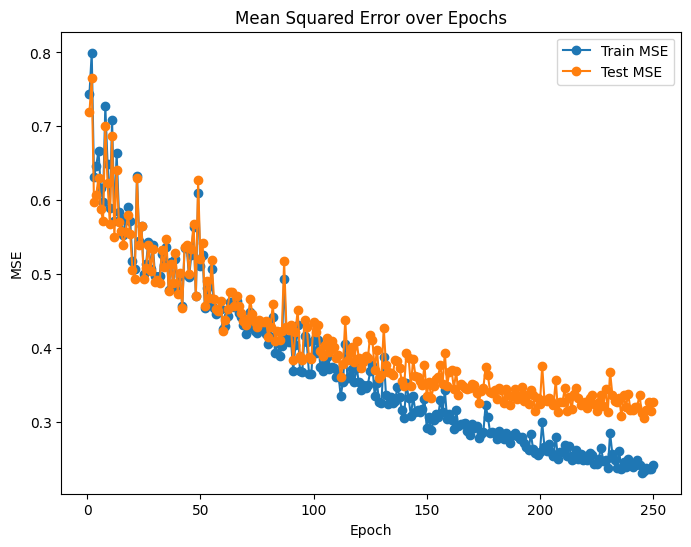

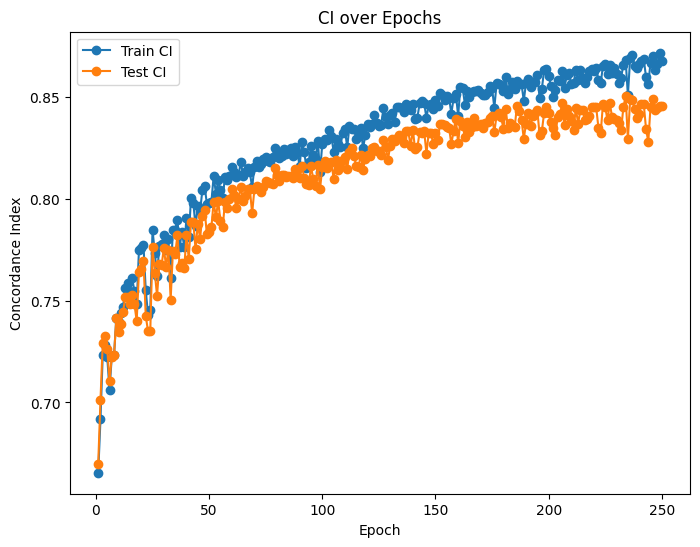

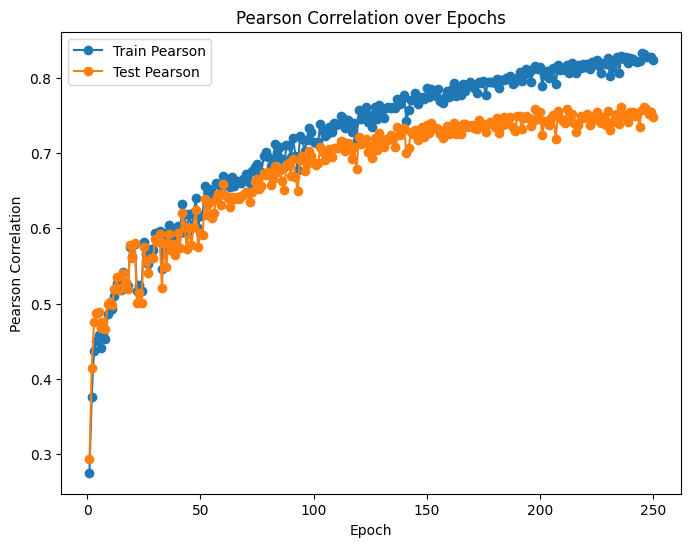

In [3]:
#model 1
import os
import warnings
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import MSELoss
from torch_geometric.nn import GCNConv, global_mean_pool as gep
from torch_geometric.data import Data, Batch
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

# Optional, for plotting:
import matplotlib.pyplot as plt

##############################################################################
#                               1. METRICS
##############################################################################

@torch.no_grad()
def ci_vectorized(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    Naive O(N^2) Concordance Index using vectorized GPU operations.
    preds, targets: (N,) on the same device (e.g. cuda).
    """
    # (N, N) differences
    p_diff = preds.unsqueeze(1) - preds.unsqueeze(0)
    t_diff = targets.unsqueeze(1) - targets.unsqueeze(0)
    # mask out pairs where targets are identical
    mask = (t_diff != 0)
    # sign of product => +1 (concordant), 0 (tie), -1 (discordant)
    sign_mat = torch.sign(p_diff * t_diff)
    # step function h(x): 1 if x>0, 0.5 if x=0, 0 if x<0
    h = (sign_mat == 1).float() + 0.5 * (sign_mat == 0).float()
    # apply mask
    h_masked = h * mask.float()
    c = h_masked.sum()
    s = mask.sum().float()
    return (c / s).item() if s > 0 else 0.0

@torch.no_grad()
def mse_torch(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    GPU-friendly MSE using torch's built-in mean squared error.
    """
    return F.mse_loss(preds, targets, reduction='mean').item()

@torch.no_grad()
def pearson_torch(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    Pearson correlation coefficient in PyTorch (GPU-friendly).
    preds, targets: (N,) on the same device
    """
    p_centered = preds - preds.mean()
    t_centered = targets - targets.mean()
    cov = (p_centered * t_centered).sum()
    denom = torch.sqrt((p_centered**2).sum()) * torch.sqrt((t_centered**2).sum())
    eps = 1e-8
    return (cov / (denom + eps)).item()

##############################################################################
#                       2. GNN MODEL DEFINITION
##############################################################################

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool as gep


class BidirectionalCrossAttention(nn.Module):
    def __init__(self, embed_dim=128, num_heads=4, chunk_size=2048):
        super().__init__()
        """
        Bidirectional Cross-Attention Formulas:
        
        For Graph A → Graph B:
            Q_A = X_A W_Q_A, K_B = X_B W_K_A, V_B = X_B W_V_A
            Z_A = softmax(Q_A K_B^T / √d) V_B
            
        For Graph B → Graph A:
            Q_B = X_B W_Q_B, K_A = X_A W_K_B, V_A = X_A W_V_B
            Z_B = softmax(Q_B K_A^T / √d) V_A
        """
        self.embed_dim = embed_dim
        self.chunk_size = chunk_size  # Adjust this value to control memory usage
        
        # Graph A → Graph B weights
        self.W_Q_A = nn.Linear(embed_dim, embed_dim)
        self.W_K_A = nn.Linear(embed_dim, embed_dim)
        self.W_V_A = nn.Linear(embed_dim, embed_dim)
        
        # Graph B → Graph A weights
        self.W_Q_B = nn.Linear(embed_dim, embed_dim)
        self.W_K_B = nn.Linear(embed_dim, embed_dim)
        self.W_V_B = nn.Linear(embed_dim, embed_dim)
        
        self.scale = 1.0 / torch.sqrt(torch.tensor(embed_dim, dtype=torch.float32))

    def forward(self, X_A, X_B, batch_A, batch_B):
        """
        Args:
            X_A: Graph A node embeddings [total_A_nodes, embed_dim]
            X_B: Graph B node embeddings [total_B_nodes, embed_dim]
            batch_A: Batch indices for Graph A [total_A_nodes]
            batch_B: Batch indices for Graph B [total_B_nodes]
        Returns:
            Z_A: Updated embeddings for Graph A (same shape as X_A)
            Z_B: Updated embeddings for Graph B (same shape as X_B)
        """
        # Compute linear projections for both directions
        Q_A = self.W_Q_A(X_A)  # [N_A, embed_dim]
        K_B = self.W_K_A(X_B)  # [N_B, embed_dim]
        V_B = self.W_V_A(X_B)  # [N_B, embed_dim]
        
        Q_B = self.W_Q_B(X_B)  # [N_B, embed_dim]
        K_A = self.W_K_B(X_A)  # [N_A, embed_dim]
        V_A = self.W_V_B(X_A)  # [N_A, embed_dim]
        
        # Create mask so that only nodes from the same sample attend to each other
        mask_AB = self._create_mask(batch_A, batch_B)  # [N_A, N_B]
        mask_BA = mask_AB.T  # [N_B, N_A]
        
        # Compute Z_A in chunks to reduce memory usage
        Z_A_chunks = []
        for i in range(0, Q_A.size(0), self.chunk_size):
            Q_A_chunk = Q_A[i:i+self.chunk_size]  # [chunk_size, embed_dim]
            # Compute attention scores for this chunk: [chunk_size, N_B]
            scores_chunk = (Q_A_chunk @ K_B.T) * self.scale
            mask_chunk = mask_AB[i:i+self.chunk_size]  # [chunk_size, N_B]
            scores_chunk = scores_chunk.masked_fill(~mask_chunk, -1e9)
            attn_chunk = F.softmax(scores_chunk, dim=-1)
            Z_A_chunk = attn_chunk @ V_B  # [chunk_size, embed_dim]
            Z_A_chunks.append(Z_A_chunk)
        Z_A = torch.cat(Z_A_chunks, dim=0)
        
        # Similarly, compute Z_B in chunks along the query dimension of Graph B
        Z_B_chunks = []
        for i in range(0, Q_B.size(0), self.chunk_size):
            Q_B_chunk = Q_B[i:i+self.chunk_size]  # [chunk_size, embed_dim]
            scores_chunk = (Q_B_chunk @ K_A.T) * self.scale  # [chunk_size, N_A]
            mask_chunk = mask_BA[i:i+self.chunk_size]  # [chunk_size, N_A]
            scores_chunk = scores_chunk.masked_fill(~mask_chunk, -1e9)
            attn_chunk = F.softmax(scores_chunk, dim=-1)
            Z_B_chunk = attn_chunk @ V_A  # [chunk_size, embed_dim]
            Z_B_chunks.append(Z_B_chunk)
        Z_B = torch.cat(Z_B_chunks, dim=0)
        
        return Z_A, Z_B

    def _create_mask(self, batch_A, batch_B):
        """Creates a mask [N_A, N_B] so that nodes only attend to nodes from the same sample."""
        return batch_A.unsqueeze(1) == batch_B.unsqueeze(0)


#############################################
# Updated GNN Model with Cross-Attention (No Extra Projection)
#############################################

def apply_stochastic_depth(layer_fn, x, y, survival_prob, training):
    """
    Applies stochastic depth to a module.
    
    Args:
        layer_fn: a function (or module) that computes the layer output.
        x: input from branch A.
        y: input from branch B.
        survival_prob (float): Probability of using the layer.
        training (bool): Whether we are in training mode.
    
    Returns:
        The outputs (Xnew, XtNew) computed by the layer or skipped.
    """
    # In evaluation mode, always use the layer.
    if not training:
        return layer_fn(x, y)
    
    # In training, decide randomly.
    if torch.rand(1).item() < survival_prob:
        # Use the layer normally.
        return layer_fn(x, y)
    else:
        # Skip the layer: simply return the inputs (i.e. bypass cross-attention)
        return x, y

class GNNNet(torch.nn.Module):
    def __init__(self, n_output=1, num_features_pro=54, num_features_mol=78, output_dim=128, dropout=0.2):
        super(GNNNet, self).__init__()
        print('GNNNet Loaded')
        self.n_output = n_output
        
        # --- Molecule branch GCN layers ---
        self.mol_conv1 = GCNConv(num_features_mol, 66)
        # Set GCN2 to output 'output_dim' so that both branches share the same dimension.
        self.mol_conv2 = GCNConv(66, num_features_mol*2)
        # GCN3 will process the updated features; input dim = output_dim.
        self.mol_conv3 = GCNConv(num_features_mol*2, num_features_mol*4)
        
        self.mol_fc_g1 = nn.Linear(num_features_mol*4, 1024)
        self.mol_fc_g2 = nn.Linear(1024, output_dim)
        
        # --- Protein branch GCN layers ---
        self.pro_conv1 = GCNConv(num_features_pro, 66)
        self.pro_conv2 = GCNConv(66, num_features_pro*2)
        self.pro_conv3 = GCNConv(num_features_pro*2, num_features_pro*4)
        
        self.pro_fc_g1 = nn.Linear(num_features_pro*4, 1024)
        self.pro_fc_g2 = nn.Linear(1024, output_dim)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.5)
        
        # --- Bidirectional Cross-Attention ---
        # Now the node features from both branches are already in R^(output_dim)
        self.cross_attn = BidirectionalCrossAttention(embed_dim=66, num_heads=4)
        
        # --- Combined FC layers ---
        self.fc1 = nn.Linear(2 * output_dim, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.out = nn.Linear(512, self.n_output)

        self.survival_prob = 0.8

    def forward(self, data_mol, data_pro):
        # Unpack molecule graph data
        mol_x, mol_edge_index, mol_batch = data_mol.x, data_mol.edge_index, data_mol.batch
        # Unpack protein graph data
        target_x, target_edge_index, target_batch = data_pro.x, data_pro.edge_index, data_pro.batch

        # --- Molecule branch: GCN1 -> GCN2 ---
        x = self.mol_conv1(mol_x, mol_edge_index)
        x = self.relu(x)
        x = self.dropout(x)
        xt = self.pro_conv1(target_x, target_edge_index)
        xt = self.relu(xt)
        xt = self.dropout(xt)


                # --- Apply bidirectional cross-attention ---
        def cross_attn_fn(a, b):
            # This function just calls the cross-attention layer.
            return self.cross_attn(a, b, mol_batch, target_batch)
        # The cross-attention module uses batch indices to ensure nodes only attend to nodes from the same sample.
        # Xnew, XtNew = self.cross_attn(x, xt, mol_batch, target_batch)
        Xnew, XtNew = apply_stochastic_depth(cross_attn_fn, x, xt, self.survival_prob, self.training)
        Xnew = self.dropout2(Xnew)
        XtNew = self.dropout2(XtNew)
        x = self.mol_conv2(Xnew, mol_edge_index)
        x = self.relu(x)
        x_updated = self.mol_conv3(x, mol_edge_index)
        x_updated = self.relu(x_updated)
        x_pooled = gep(x_updated, mol_batch)  # Global pooling for molecule graphs
        

        
        # --- Protein branch: GCN2 -> GCN3 ---

        xt = self.pro_conv2(XtNew, target_edge_index)
        xt = self.relu(xt)
        
        xt_updated = self.pro_conv3(xt, target_edge_index)
        xt_updated = self.relu(xt_updated)
        xt_pooled = gep(xt_updated, target_batch)  # Global pooling for protein graphs
        
        # --- Flatten branch outputs through FC layers ---
        x_final = self.mol_fc_g2(self.relu(self.mol_fc_g1(x_pooled)))
        x_final = self.dropout(x_final)
        xt_final = self.pro_fc_g2(self.relu(self.pro_fc_g1(xt_pooled)))
        xt_final = self.dropout(xt_final)
        
        # --- Concatenate and apply combined FC layers ---
        xc = torch.cat((x_final, xt_final), dim=1)
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        
        return out

##############################################################################
#                   3. DATA LOADING HELPERS
##############################################################################

warnings.filterwarnings('ignore', category=FutureWarning)

def load_sample(path):
    """
    Load a .pt sample, fix up 'x' and 'edge_index', return (mol_data, pro_data, target).
    """
    sample = torch.load(path)
    mol_data, pro_data, target = sample[0], sample[1], sample[2]

    # Convert dict to Data if needed
    if isinstance(mol_data, dict):
        mol_data = Data(**mol_data)
    if isinstance(pro_data, dict):
        pro_data = Data(**pro_data)

    # Fix x
    if not hasattr(mol_data, 'x') or mol_data.x is None:
        if hasattr(mol_data, 'features'):
            mol_data.x = mol_data.features
            del mol_data.features
        else:
            raise ValueError("mol_data missing 'x' or 'features'")
    if not hasattr(pro_data, 'x') or pro_data.x is None:
        if hasattr(pro_data, 'features'):
            pro_data.x = pro_data.features
            del pro_data.features
        else:
            raise ValueError("pro_data missing 'x' or 'features'")

    mol_data.x = torch.as_tensor(mol_data.x, dtype=torch.float32)
    pro_data.x = torch.as_tensor(pro_data.x, dtype=torch.float32)

    # Fix edge_index
    def fix_edge_index(d):
        if not isinstance(d.edge_index, torch.Tensor):
            d.edge_index = torch.tensor(d.edge_index, dtype=torch.long)
        else:
            d.edge_index = d.edge_index.long()
        if d.edge_index.shape[0] != 2:
            d.edge_index = d.edge_index.t()
        d.num_nodes = d.x.size(0)

    fix_edge_index(mol_data)
    fix_edge_index(pro_data)

    return (mol_data, pro_data, target)

def batch_loader(file_list, sample_dir, batch_size):
    """
    Yields batches of (mol_data, pro_data, target) from file_list.
    """
    batch = []
    for file_name in file_list:
        path = os.path.join(sample_dir, file_name)
        sample = load_sample(path)
        batch.append(sample)
        if len(batch) == batch_size:
            yield batch
            batch = []
    if batch:
        yield batch

##############################################################################
#              4. TRAINING / EVALUATION WITH METRICS EACH EPOCH
##############################################################################

import os
import torch

def train_and_evaluate(sample_dir, num_epochs=10, test_size=0.2, lr=0.001):
    """
    Trains the GNN model, evaluates on train & test each epoch, saves metrics + checkpoints.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Running on {device}.")

    # Gather samples
    sample_files = [f for f in os.listdir(sample_dir) if f.endswith('.pt')]
    assert len(sample_files) > 0, "No .pt files found in sample_dir!"

    # Split
    train_files, test_files = train_test_split(sample_files, test_size=test_size, random_state=42)

    # Make checkpoint dir
    training_model_dir = os.path.join(os.getcwd(), 'TrainingModel1')
    os.makedirs(training_model_dir, exist_ok=True)
    print(f"Checkpoints will be saved to: {training_model_dir}")

    metrics_path = os.path.join(training_model_dir, "training_metrics.pt")

    # Load existing metrics if available (Ensures metrics continue from previous runs)
    if os.path.exists(metrics_path):
        saved_metrics = torch.load(metrics_path)
        train_metrics = saved_metrics['train_metrics']
        test_metrics = saved_metrics['test_metrics']
        print("Loaded previous training metrics!")
    else:
        train_metrics = {'epoch': [], 'mse': [], 'ci': [], 'pearson': []}
        test_metrics = {'epoch': [], 'mse': [], 'ci': [], 'pearson': []}
        print("Starting fresh metrics tracking.")

    # Infer input dims from one sample
    sample0 = load_sample(os.path.join(sample_dir, train_files[0]))
    mol_data0, pro_data0 = sample0[0], sample0[1]
    num_features_mol = mol_data0.x.size(1)
    num_features_pro = pro_data0.x.size(1)

    # Initialize model
    model = GNNNet(num_features_mol=num_features_mol,
                   num_features_pro=num_features_pro).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = MSELoss()

    # Possibly resume from checkpoint
    start_epoch = 1
    existing_checkpoints = [
        f for f in os.listdir(training_model_dir)
        if f.endswith('.pt') and f.startswith('model_epoch')
    ]
    last_ckpt_path = None  # Track previous checkpoint for deletion

    if existing_checkpoints:
        latest_ckpt = max(existing_checkpoints, key=lambda x: int(x.split('_epoch')[1].split('.pt')[0]))
        ckpt_path = os.path.join(training_model_dir, latest_ckpt)
        print(f"Loading checkpoint from {ckpt_path}")
        ckpt = torch.load(ckpt_path, map_location=device)
        model.load_state_dict(ckpt['model_state_dict'])
        optimizer.load_state_dict(ckpt['optimizer_state_dict'])
        loaded_epoch = ckpt['epoch']
        start_epoch = loaded_epoch + 1
        last_ckpt_path = ckpt_path  # Store last checkpoint path for deletion
        print(f"Resuming from epoch {start_epoch}")
    else:
        print("No existing checkpoint found; starting fresh.")

    @torch.no_grad()
    def evaluate(files):
        model.eval()
        all_preds = []
        all_targets = []
        batch_eval_size = 200
        for batch_samples in batch_loader(files, sample_dir, batch_eval_size):
            mol_list, pro_list, tgt_list = [], [], []
            for (md, pd, t) in batch_samples:
                mol_list.append(md)
                pro_list.append(pd)
                tgt_list.append(t)

            mol_batch = Batch.from_data_list(mol_list).to(device)
            pro_batch = Batch.from_data_list(pro_list).to(device)
            t_tensor = torch.tensor(tgt_list, dtype=torch.float32, device=device)

            out = model(mol_batch, pro_batch).view(-1)
            all_preds.append(out)
            all_targets.append(t_tensor)

        all_preds = torch.cat(all_preds, dim=0)
        all_targets = torch.cat(all_targets, dim=0)

        mse_val = mse_torch(all_preds, all_targets)
        ci_val = ci_vectorized(all_preds, all_targets)
        pearson_val = pearson_torch(all_preds, all_targets)
        return mse_val, ci_val, pearson_val

    # Training loop
    batch_size = 50
    for epoch in tqdm(range(start_epoch, num_epochs + 1), desc="Training", unit="epoch"):
        model.train()
        running_loss = 0.0

        for batch_samples in batch_loader(train_files, sample_dir, batch_size):
            mol_list, pro_list, tgt_list = [], [], []
            for (md, pd, t) in batch_samples:
                mol_list.append(md)
                pro_list.append(pd)
                tgt_list.append(t)

            mol_batch = Batch.from_data_list(mol_list).to(device)
            pro_batch = Batch.from_data_list(pro_list).to(device)
            t_tensor = torch.tensor(tgt_list, dtype=torch.float32, device=device).view(-1)

            optimizer.zero_grad()
            out = model(mol_batch, pro_batch).view(-1)
            loss = loss_fn(out, t_tensor)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * len(batch_samples)

        avg_loss = running_loss / len(train_files)
        tqdm.write(f"[Epoch {epoch}/{num_epochs}] Training Loss: {avg_loss:.4f}")

        # Evaluate on train & test
        train_mse, train_ci, train_pearson = evaluate(train_files)
        test_mse, test_ci, test_pearson = evaluate(test_files)

        train_metrics['epoch'].append(epoch)
        train_metrics['mse'].append(train_mse)
        train_metrics['ci'].append(train_ci)
        train_metrics['pearson'].append(train_pearson)

        test_metrics['epoch'].append(epoch)
        test_metrics['mse'].append(test_mse)
        test_metrics['ci'].append(test_ci)
        test_metrics['pearson'].append(test_pearson)

        tqdm.write(f"  Train => MSE={train_mse:.4f}, CI={train_ci:.4f}, Pearson={train_pearson:.4f}")
        tqdm.write(f"  Test  => MSE={test_mse:.4f}, CI={test_ci:.4f}, Pearson={test_pearson:.4f}")

        # Save new checkpoint
        ckpt_name = f"model_epoch{epoch}.pt"
        ckpt_path = os.path.join(training_model_dir, ckpt_name)
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
        }, ckpt_path)
        tqdm.write(f"Checkpoint saved at epoch {epoch}")

        # Delete the previous checkpoint after saving the new one
        if last_ckpt_path and os.path.exists(last_ckpt_path):
            os.remove(last_ckpt_path)
            tqdm.write(f"Deleted previous checkpoint: {last_ckpt_path}")

        # Update last checkpoint path
        last_ckpt_path = ckpt_path

        # Save/Update the metrics after each epoch
        torch.save({
            'train_metrics': train_metrics,
            'test_metrics': test_metrics
        }, metrics_path)

    # Final evaluations
    final_train_mse, final_train_ci, final_train_pearson = evaluate(train_files)
    final_test_mse, final_test_ci, final_test_pearson = evaluate(test_files)
    print(f"\nFinal Train => MSE={final_train_mse:.4f}, CI={final_train_ci:.4f}, Pearson={final_train_pearson:.4f}")
    print(f"Final Test  => MSE={final_test_mse:.4f}, CI={final_test_ci:.4f}, Pearson={final_test_pearson:.4f}")

    # Save final metrics
    torch.save({
        'train_metrics': train_metrics,
        'test_metrics': test_metrics
    }, metrics_path)
    print(f"Metrics saved to {metrics_path}")

    return train_metrics, test_metrics


##############################################################################
#               5. OPTIONAL: PLOT THE SAVED METRICS
##############################################################################

def plot_metrics(checkpoint_dir='TrainingModel1'):
    """
    Load training_metrics.pt from the checkpoint_dir and plot MSE, CI, Pearson over epochs.
    """
    metrics_path = os.path.join(checkpoint_dir, "training_metrics.pt")
    if not os.path.exists(metrics_path):
        print(f"No metrics file found at {metrics_path}!")
        return

    saved_data = torch.load(metrics_path)
    train_metrics = saved_data['train_metrics']
    test_metrics = saved_data['test_metrics']
    epochs = train_metrics['epoch']

    # Plot MSE
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['mse'], 'o-', label='Train MSE')
    plt.plot(epochs, test_metrics['mse'], 'o-', label='Test MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('Mean Squared Error over Epochs')
    plt.legend()
    plt.savefig(os.path.join(checkpoint_dir, "MSE_plot.png"))  
    plt.show()

    # Plot CI
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['ci'], 'o-', label='Train CI')
    plt.plot(epochs, test_metrics['ci'], 'o-', label='Test CI')
    plt.xlabel('Epoch')
    plt.ylabel('Concordance Index')
    plt.title('CI over Epochs')
    plt.legend()
    plt.savefig(os.path.join(checkpoint_dir, "CI_plot.png"))  
    plt.show()

    # Plot Pearson
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['pearson'], 'o-', label='Train Pearson')
    plt.plot(epochs, test_metrics['pearson'], 'o-', label='Test Pearson')
    plt.xlabel('Epoch')
    plt.ylabel('Pearson Correlation')
    plt.title('Pearson Correlation over Epochs')
    plt.legend()
    plt.savefig(os.path.join(checkpoint_dir, "PEARSON_plot.png"))  
    plt.show()

##############################################################################
#                                 MAIN
##############################################################################

if __name__ == "__main__":
    # Adjust the paths/parameters as needed
    SAMPLE_DIR = "prepared_samples"   # Directory with your .pt samples
    NUM_EPOCHS = 250
    TEST_SPLIT = 0.2
    LR = 0.001

    # 1) Train and evaluate
    train_metrics, test_metrics = train_and_evaluate(
        sample_dir=SAMPLE_DIR,
        num_epochs=NUM_EPOCHS,
        test_size=TEST_SPLIT,
        lr=LR
    )

    # 2) Plot the metrics
    plot_metrics('TrainingModel1')

